In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [2]:
beh_data_dir = "data/COBAR_behaviour_incl_manual.pkl"
#beh_data_dir = "data/COBAR_behaviour.pkl"
beh_df = pd.read_pickle(beh_data_dir)
beh_df

t           twop_index  \
Date   Genotype Fly Trial Frame                                    
210301 J1xCI9   1   0     0        0.005133 -9223372036854775808   
                          1        0.015100 -9223372036854775808   
                          2        0.025100 -9223372036854775808   
                          3        0.035100 -9223372036854775808   
                          4        0.045100 -9223372036854775808   
...                                     ...                  ...   
                    11    25195  251.800000 -9223372036854775808   
                          25196  251.809967 -9223372036854775808   
                          25197  251.819967 -9223372036854775808   
                          25198  251.829967 -9223372036854775808   
                          25199  251.839967 -9223372036854775808   

                                 angle_RF_leg_Coxa_yaw  angle_RF_leg_Coxa  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   0     0                   0.288564           0.406265   
                          1                   0.288564           0.406265   
                          2                   0.358618           0.451284   
                          3                   0.358618           0.451284   
                          4                   0.358618           0.451284   
...                                                ...                ...   
                    11    25195               0.358769           0.444905   
                          25196               0.353103           0.469299   
                          25197               0.353103           0.469299   
                          25198               0.353103           0.469299   
                          25199               0.245832           0.504851   

                                 angle_RF_leg_Coxa_roll  angle_RF_leg_Femur  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0                   -0.484703           -2.437838   
                          1                   -0.501312           -2.448196   
                          2                   -0.489070           -2.514260   
                          3                   -0.514999           -2.504808   
                          4                   -0.497719           -2.494613   
...                                                 ...                 ...   
                    11    25195               -0.703572           -2.578151   
                          25196               -0.713546           -2.601049   
                          25197               -0.713546           -2.601049   
                          25198               -0.743495           -2.590083   
                          25199               -0.739525           -2.634876   

                                 angle_RF_leg_Tibia  angle_RF_leg_Femur_roll  \
Date   Genotype Fly Trial Frame                                                
210301 J1xCI9   1   0     0                2.119772                -0.070825   
                          1                2.097349                -0.089947   
                          2                2.128461                -0.030327   
                          3                2.093834                -0.056415   
                          4                2.116635                -0.038385   
...                                             ...                      ...   
                    11    25195            2.220802                -0.021502   
                          25196            2.245679                -0.019357   
                          25197            2.298148                -0.020857   
                          25198            2.235951                -0.029271   
                          25199            2.185196                -0.055439   

                                 angle_RF_leg_Tarsus  angle_RM_leg_Coxa_yaw  \
Date   

In [3]:
neural_data_dir = beh_data_dir = "data/COBAR_neural.pkl"
neural_df = pd.read_pickle(neural_data_dir)
neural_df

t     neuron_0    neuron_1  \
Date   Genotype Fly Trial Frame                                        
210301 J1xCI9   1   0     0        1.846767   886.468822  539.078854   
                          1        1.908333   904.990346  549.142576   
                          2        1.969900   951.343444  495.389359   
                          3        2.031467   919.118001  488.734655   
                          4        2.093000   811.207176  598.854688   
...                                     ...          ...         ...   
                    11    4035   250.257500  1091.733025  229.036370   
                          4036   250.319067  1083.689512  224.277678   
                          4037   250.380600  1016.800708  263.032693   
                          4038   250.442167  1100.966747  217.181669   
                          4039   250.503733  1127.533714  211.338355   

                                    neuron_2     neuron_3     neuron_4  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   0     0       648.448219   659.934798   960.886917   
                          1       641.978012   673.451323   959.120909   
                          2       667.900427   647.023920   922.999666   
                          3       627.207506   669.359604   967.324279   
                          4       598.844883   614.788711   927.682820   
...                                      ...          ...          ...   
                    11    4035   1673.098351  2788.830860  1832.827041   
                          4036   1626.795243  2803.103042  1869.423843   
                          4037   1624.789506  2755.284855  1924.012693   
                          4038   1569.018839  2890.244587  1921.096732   
                          4039   1718.190280  2731.183736  2022.781228   

                                    neuron_5     neuron_6     neuron_7  \
Date   Genotype Fly Trial Frame                                          
210301 J1xCI9   1   0     0      1087.578005  1264.055465   689.275322   
                          1      1033.622170  1293.954485   647.848768   
                          2      1035.334534  1298.692514   668.630966   
                          3      1081.832837  1320.492280   697.383989   
                          4      1015.316407  1274.834253   679.311958   
...                                      ...          ...          ...   
                    11    4035   1548.782680  1388.706244  2238.306798   
                          4036   1675.233107  1604.436872  2281.367960   
                          4037   1810.982975  1496.055076  2359.644688   
                          4038   1735.650159  1389.671633  2330.835800   
                          4039   1826.932777  1474.406872  2223.860182   

                                    neuron_8  ...   neuron_113   neuron_114  \
Date   Genotype Fly Trial Frame               ...                             
210301 J1xCI9   1   0     0      1297.684359  ...  1434.945788  1039.457277   
                          1      1253.930092  ...  1432.954386  1032.438934   
                          2      1285.729967  ...  1358.161531   974.769252   
                          3      1255.667939  ...  1386.650784  1004.453438   
                          4      1241.864999  ...  1352.036969   972.731774   
...                                      ...  ...          ...          ...   
                    11    4035   2029.408911  ...   887.114691  1734.396430   
                          4036   2128.465504  ...  1002.946415  1733.634185   
                          4037   2044.958695  ...  1064.565073  1804.522860   
                          4038   2068.464632  ...  1058.037690  1807.967783   
                          4039   1991.379295  ...  1080.679242  1871.425640   

                                  neuron_115   neuron_116  neuron_117  \
Date   Genotype Fly Trial Frame                                         
21030

Here the filtering part, to use it just copy the cell where i define the function and the first lines where define the new filtered panda dataframe

<IPython.core.display.Javascript object>


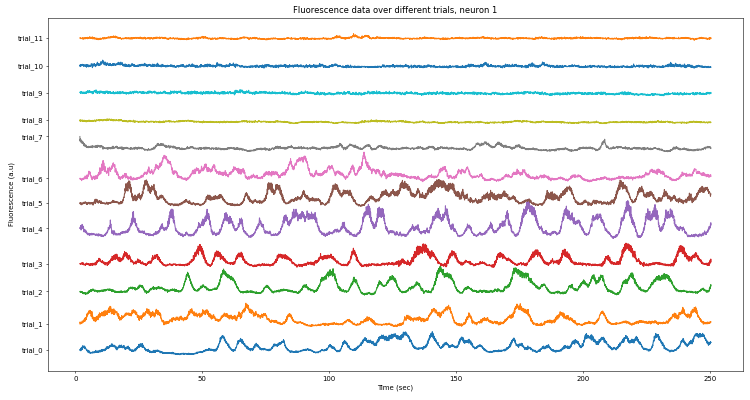

In [44]:
#first reference graph before filtering for neural fleurence data (will then polish it better as for the second one
%matplotlib notebook
import mpld3
mpld3.enable_notebook()
#neural_signals_trial_5 = neural_data[neural_data.index.get_level_values("Trial")==5]
neural_signals_neuron_1 = neural_df["neuron_1"]
# We construct a 3x3 matrix whose elements will be subplots depending on the column and row number they span
fig, ax1 = plt.subplots(figsize = (15,8))

ytick = []
for i in np.arange(12):   
    neural_signals_neuron_1_trial_i = neural_signals_neuron_1[neural_df.index.get_level_values("Trial")==i]
    #ax1.plot(neural_df["t"].iloc[:380], i*1500 + neural_signals_neuron_1_trial_i.iloc[:380], label = 'trial_' + str(i))
    ax1.plot(neural_df["t"].iloc[:4039], i*1500 + neural_signals_neuron_1_trial_i.iloc[:4039], label = 'trial_' + str(i))
    ytick.append(neural_signals_neuron_1_trial_i.iloc[0] + i*1500)
    
ax1.set_ylabel('Fluorescence (a.u)')
ax1.set_xlabel('Time (sec)')
ax1.set_title('Fluorescence data over different trials, neuron 1')

ax1.set_yticks(np.array(ytick))
neuron_names = ['trial_' + str(i) for i in range(12)]
ax1.set_yticklabels(neuron_names)


plt.tight_layout()
plt.show()
fig.savefig('report_images/w8_fluo_neurone1.png')

In [4]:

# Filter requirements Butterworth
def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data, axis=0)
    return y
filtered_neural_df = neural_df.copy(deep=True) #necessary to deep copy dataaframe
fs=16.0
order=2
cutoff=2.5
filtered_neural_df_neuron_1 = butter_lowpass_filter(neural_df['neuron_1'], cutoff, fs, order) #this line has to be used with the following one
filtered_neural_df.neuron_1=filtered_neural_df_neuron_1 #this line has to be used, cutoff is 2.5

<IPython.core.display.Javascript object>


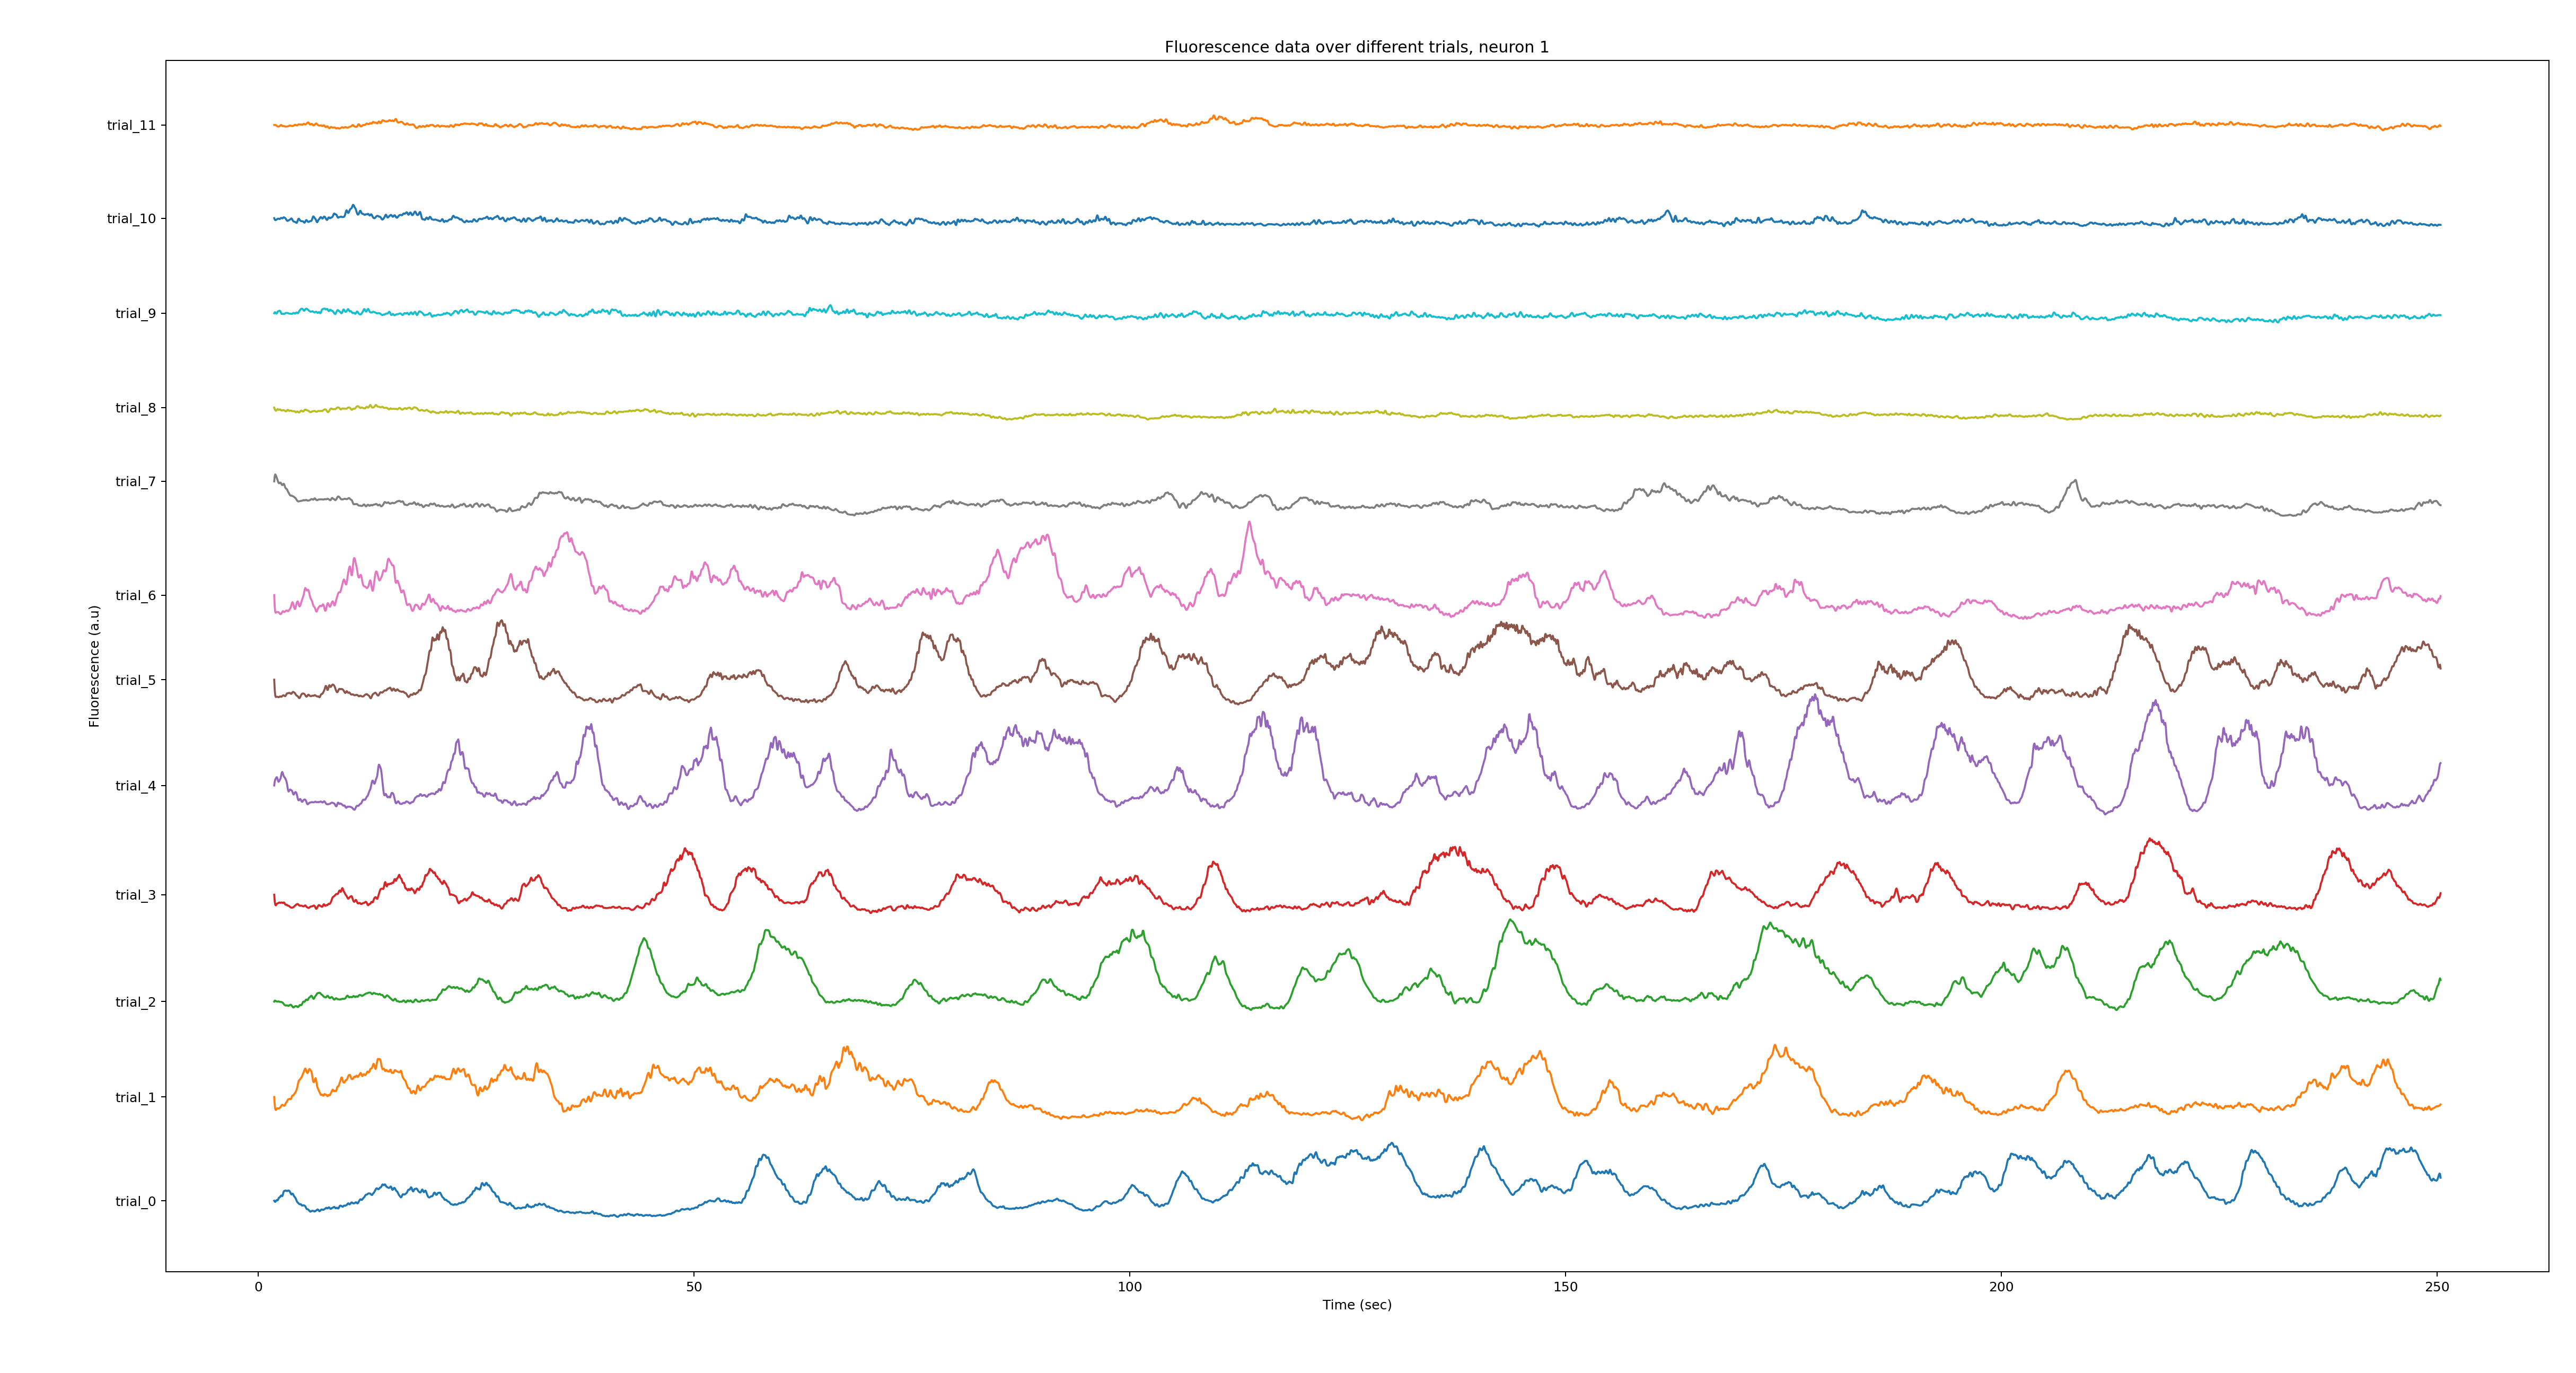

In [5]:


#this is jsut for plotting
neural_signals_neuron_1 = filtered_neural_df['neuron_1']
%matplotlib notebook
import mpld3
mpld3.enable_notebook()
#neural_signals_trial_5 = neural_data[neural_data.index.get_level_values("Trial")==5]
#neural_signals_neuron_1 = neural_df["neuron_1"]
# We construct a 3x3 matrix whose elements will be subplots depending on the column and row number they span
fig, ax1 = plt.subplots(figsize = (15,8))

ytick = []
for i in np.arange(12):   
    neural_signals_neuron_1_trial_i = neural_signals_neuron_1[neural_df.index.get_level_values("Trial")==i]
    #ax1.plot(neural_df["t"].iloc[:380], i*1500 + neural_signals_neuron_1_trial_i.iloc[:380], label = 'trial_' + str(i))
    ax1.plot(neural_df["t"].iloc[:4039], i*1500 + neural_signals_neuron_1_trial_i.iloc[:4039], label = 'trial_' + str(i))
    ytick.append(neural_signals_neuron_1_trial_i.iloc[0] + i*1500)
    
ax1.set_ylabel('Fluorescence (a.u)')
ax1.set_xlabel('Time (sec)')
ax1.set_title('Fluorescence data over different trials, neuron 1')

ax1.set_yticks(np.array(ytick))
neuron_names = ['trial_' + str(i) for i in range(12)]
ax1.set_yticklabels(neuron_names)


plt.tight_layout()
plt.show()
fig.savefig('report_images/w8_fluo_neurone1.png')

Same buttenworth filter but for beh data, take whatever cutoof you prefer probably, i would say around 21

<IPython.core.display.Javascript object>


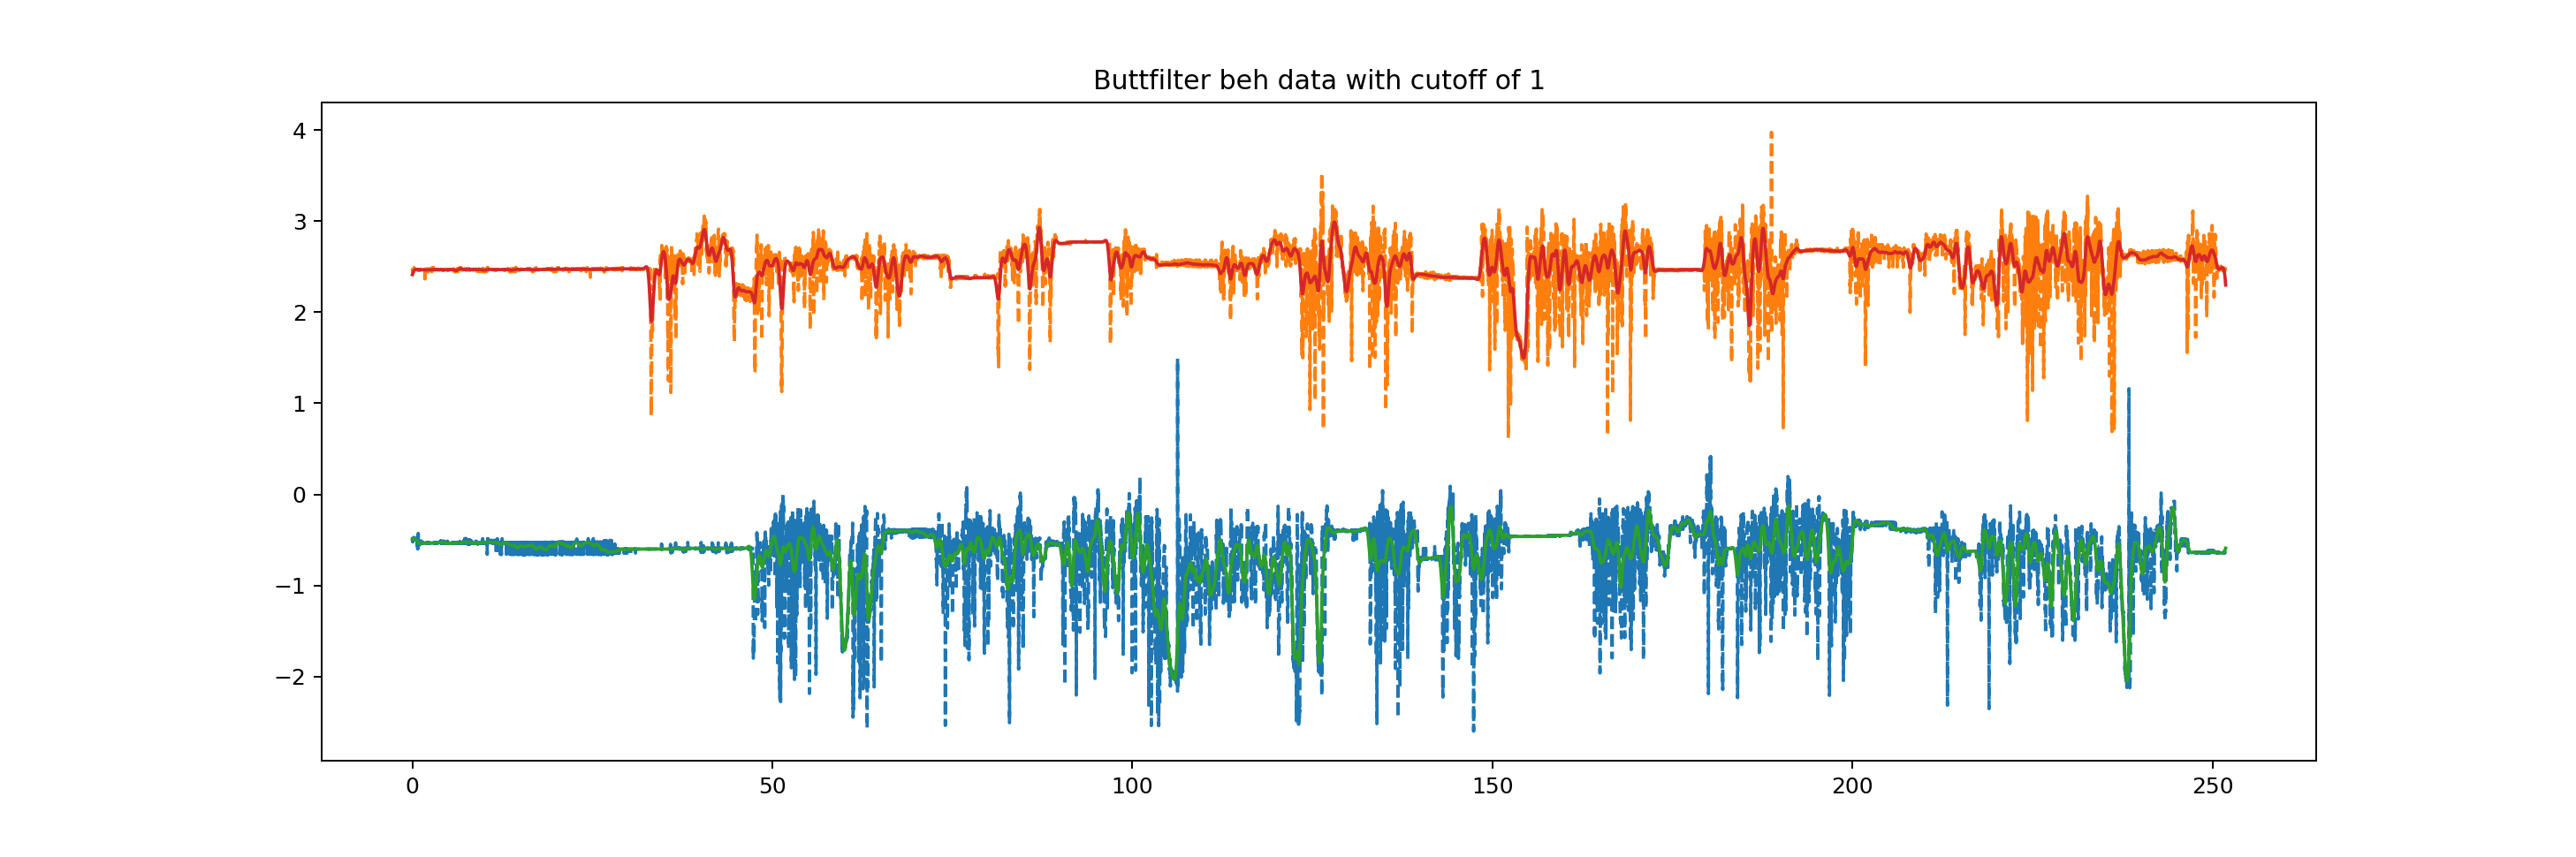

<IPython.core.display.Javascript object>


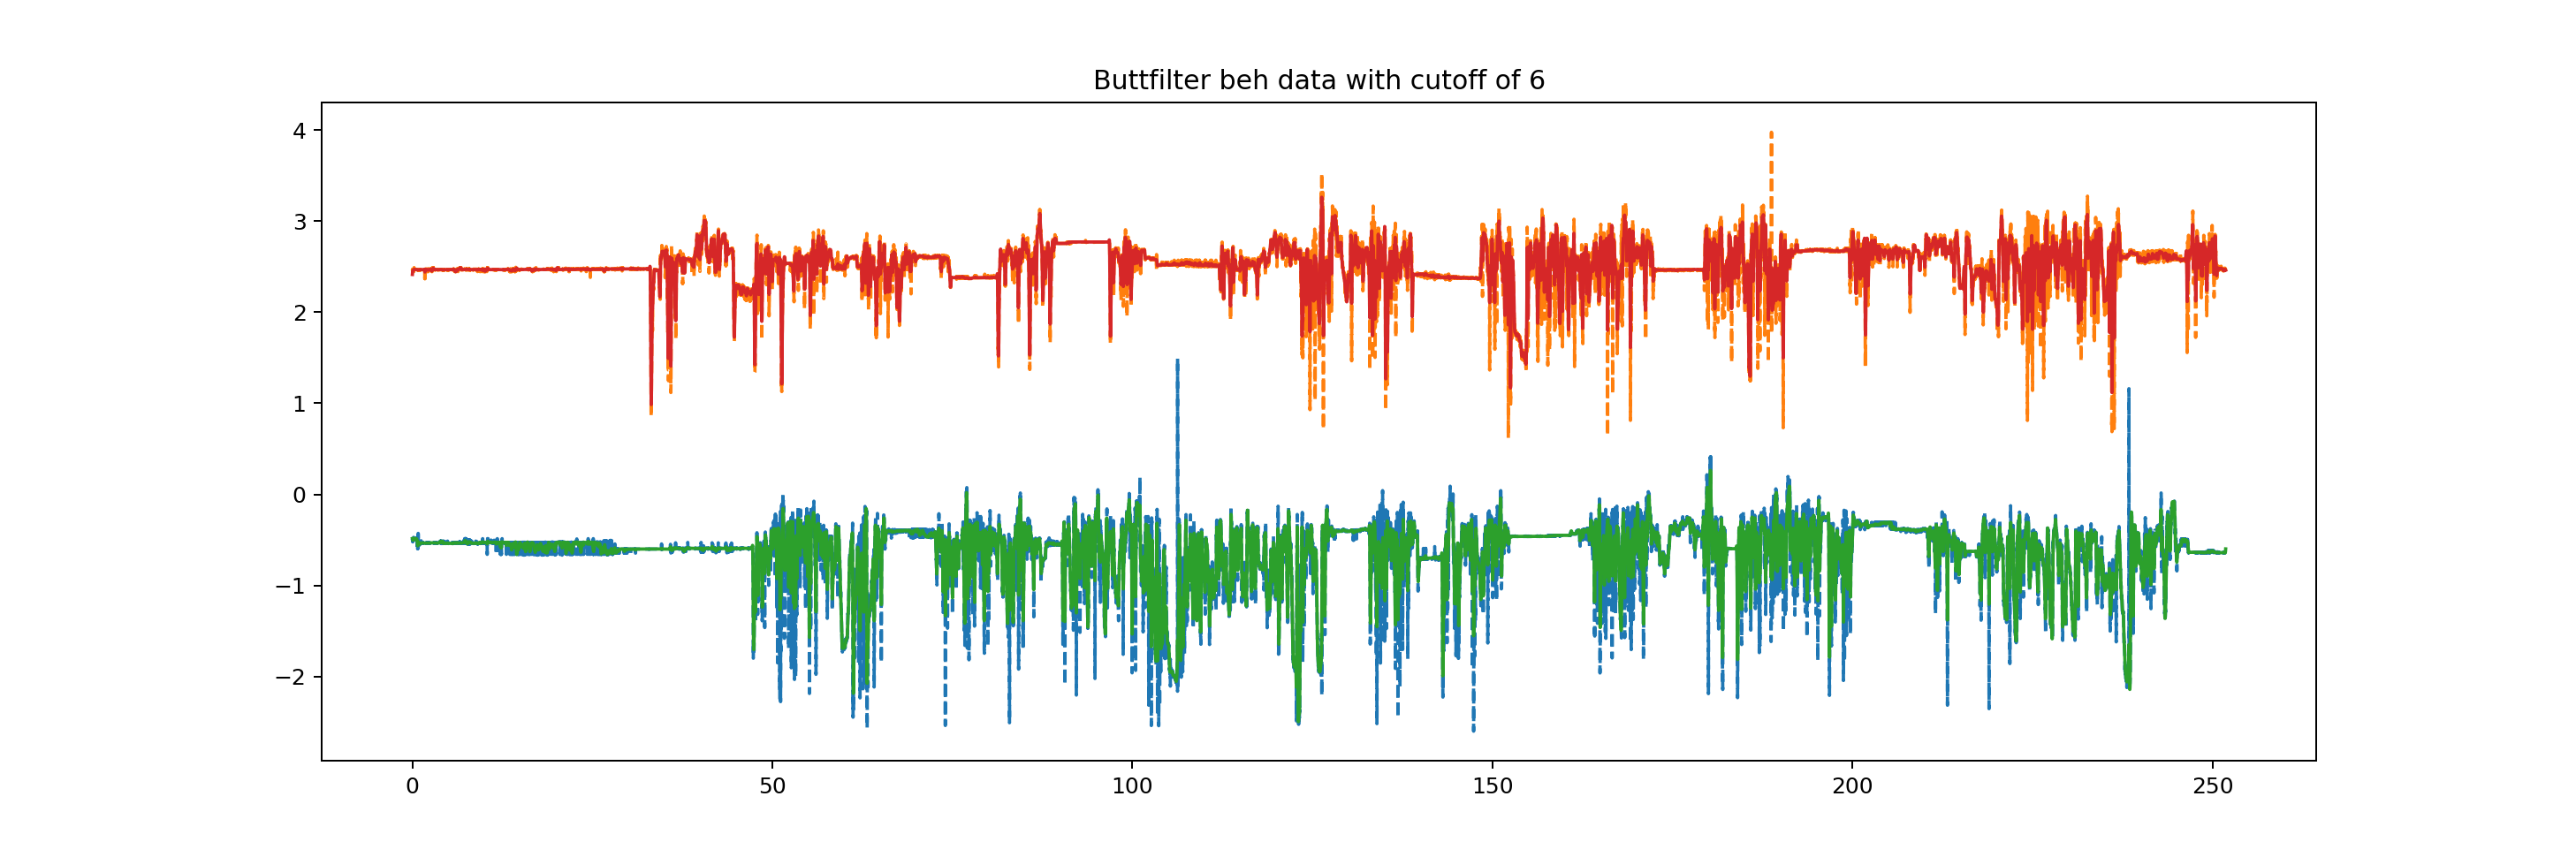

<IPython.core.display.Javascript object>


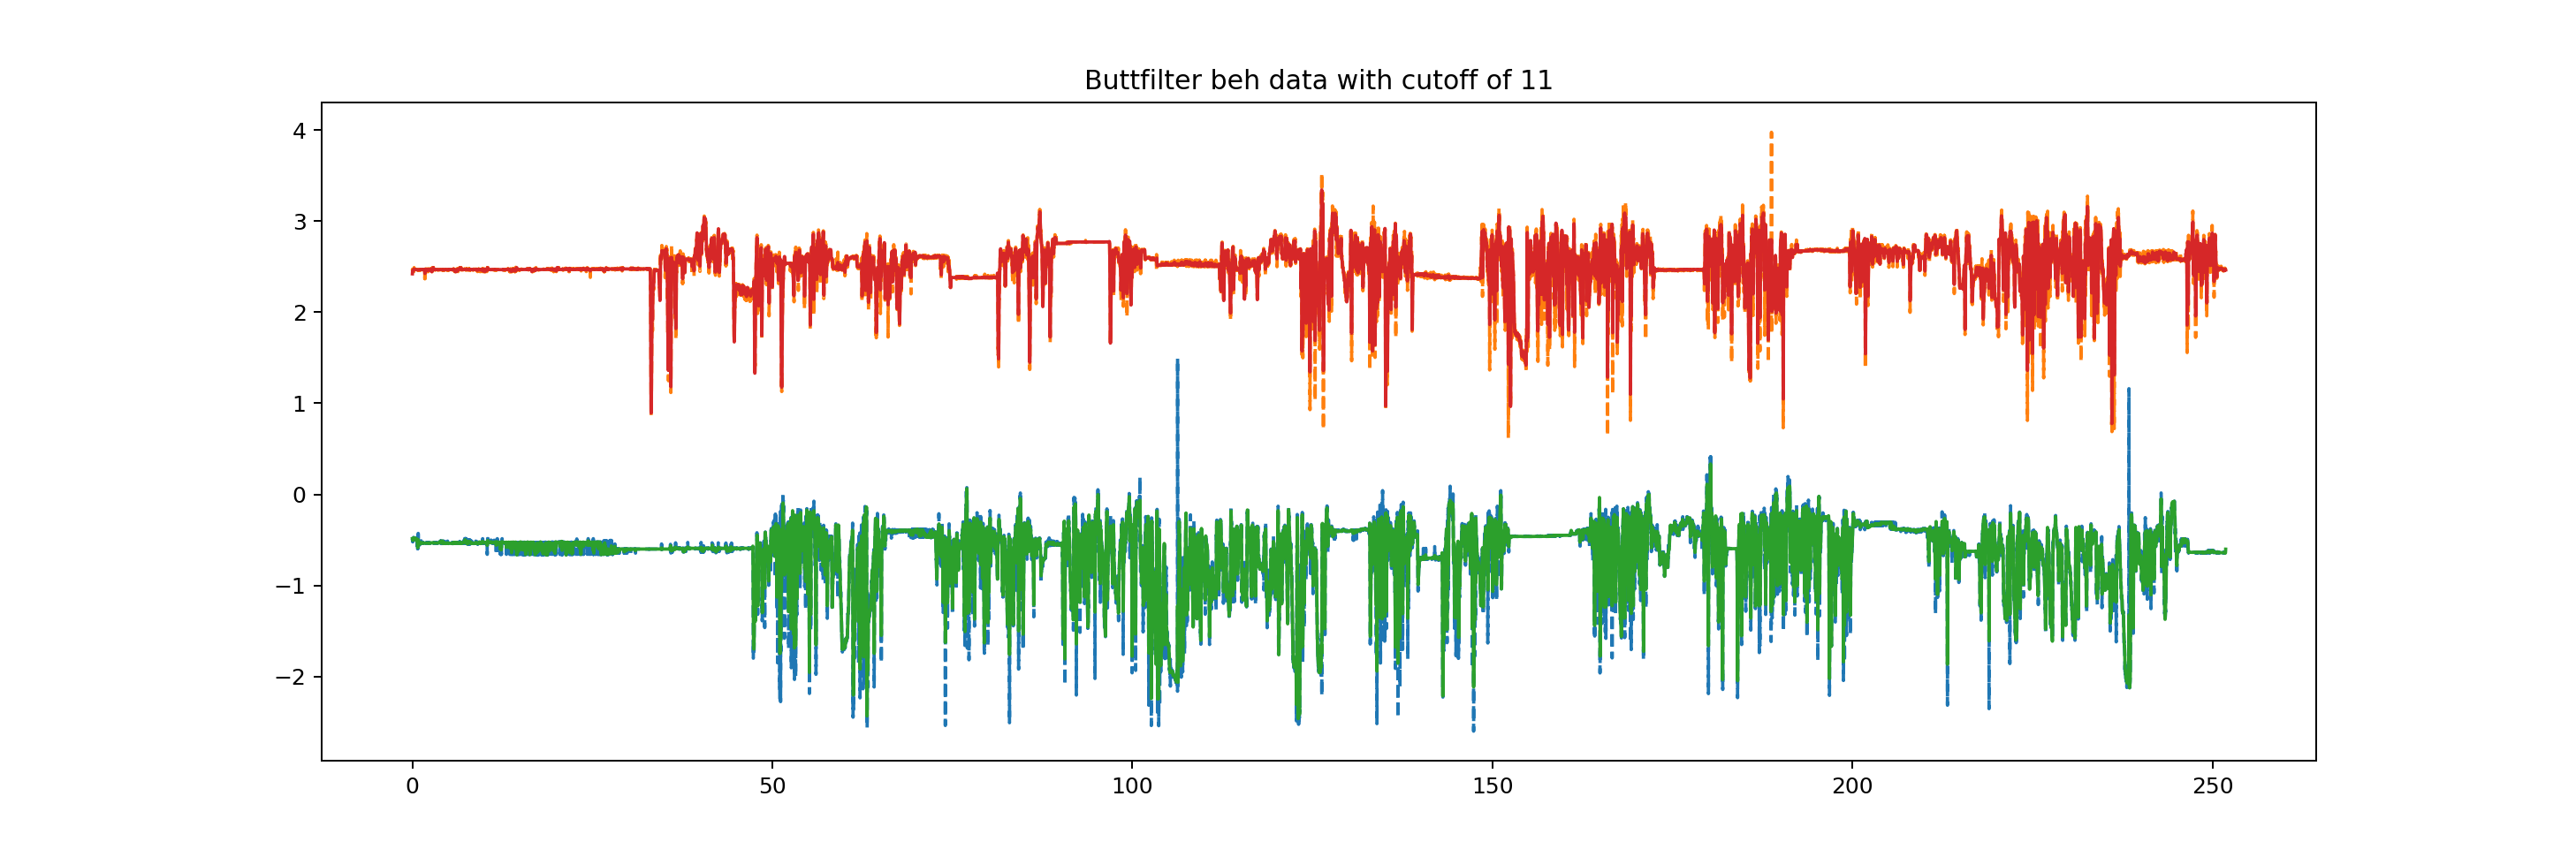

<IPython.core.display.Javascript object>


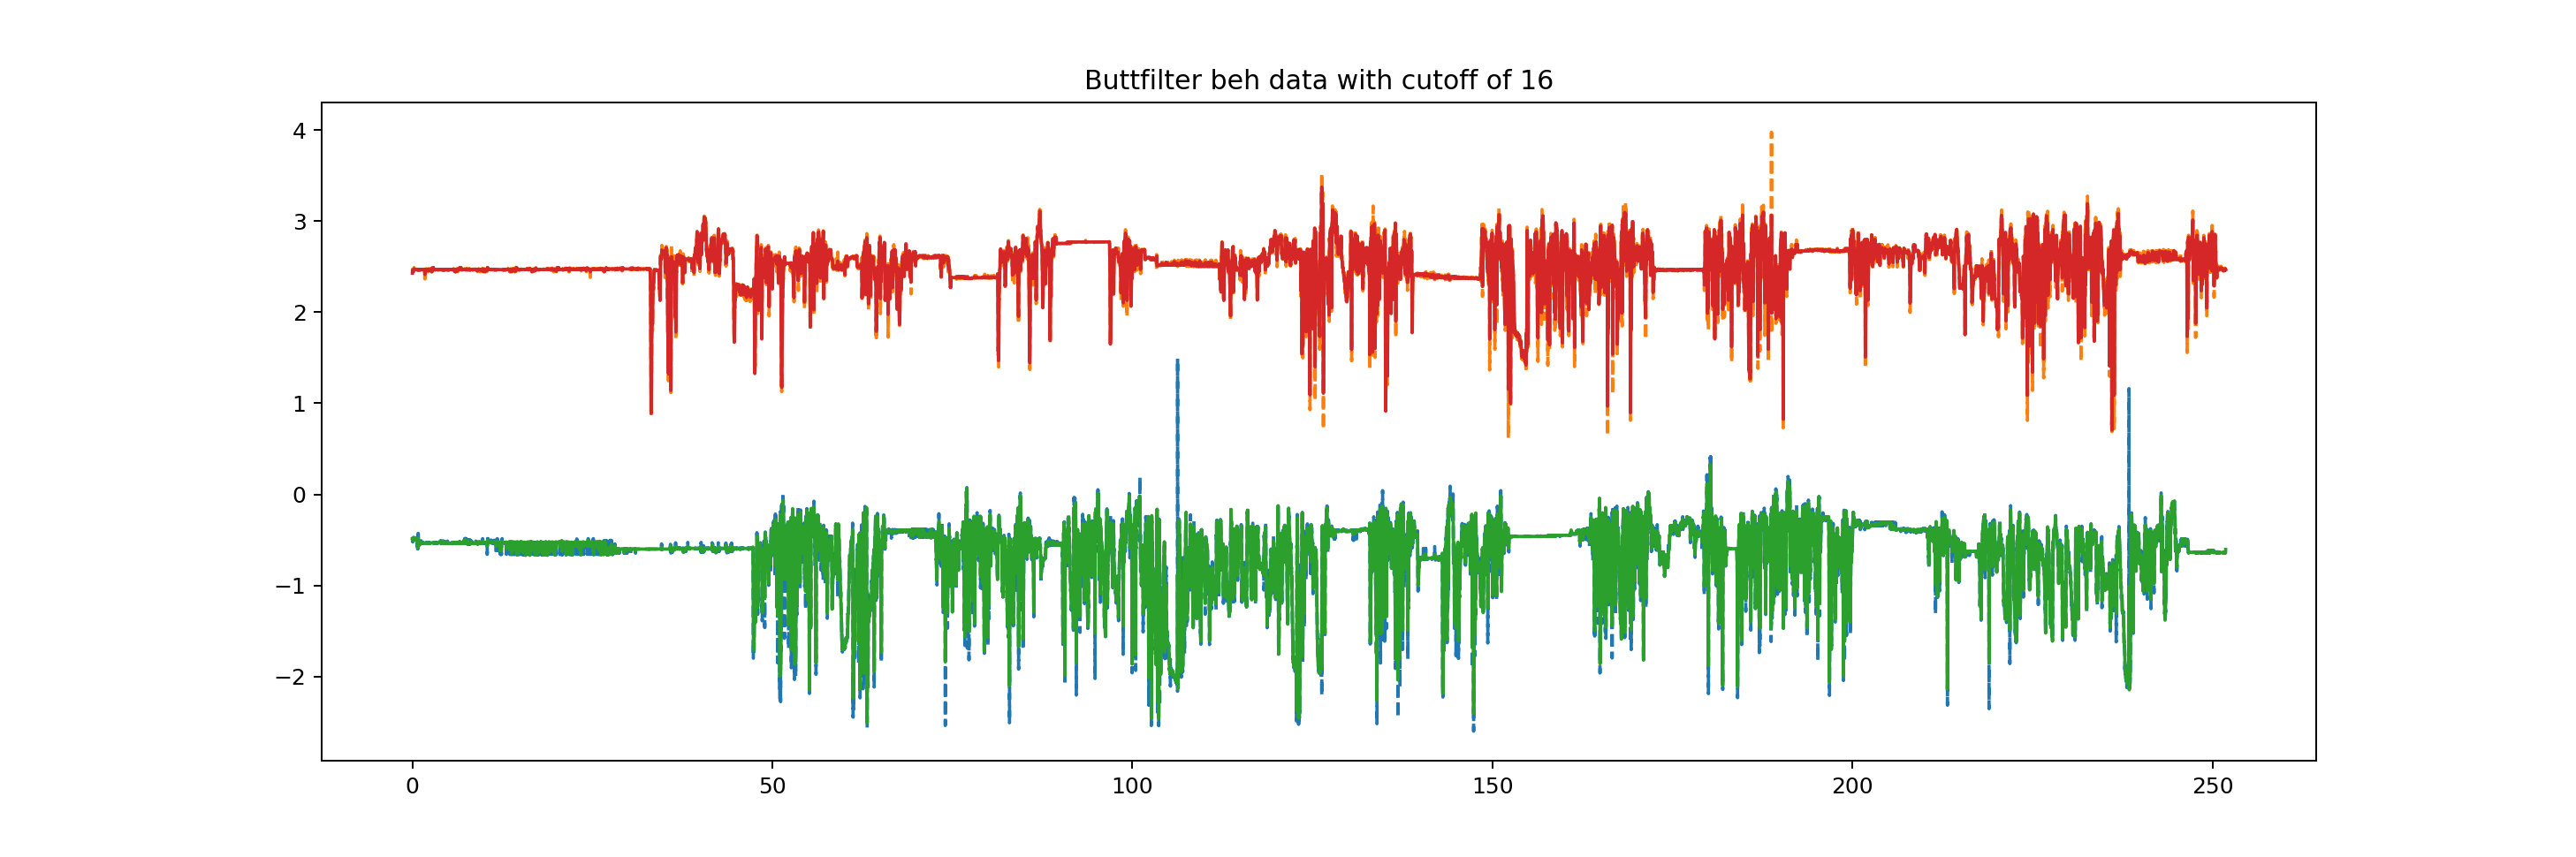

<IPython.core.display.Javascript object>


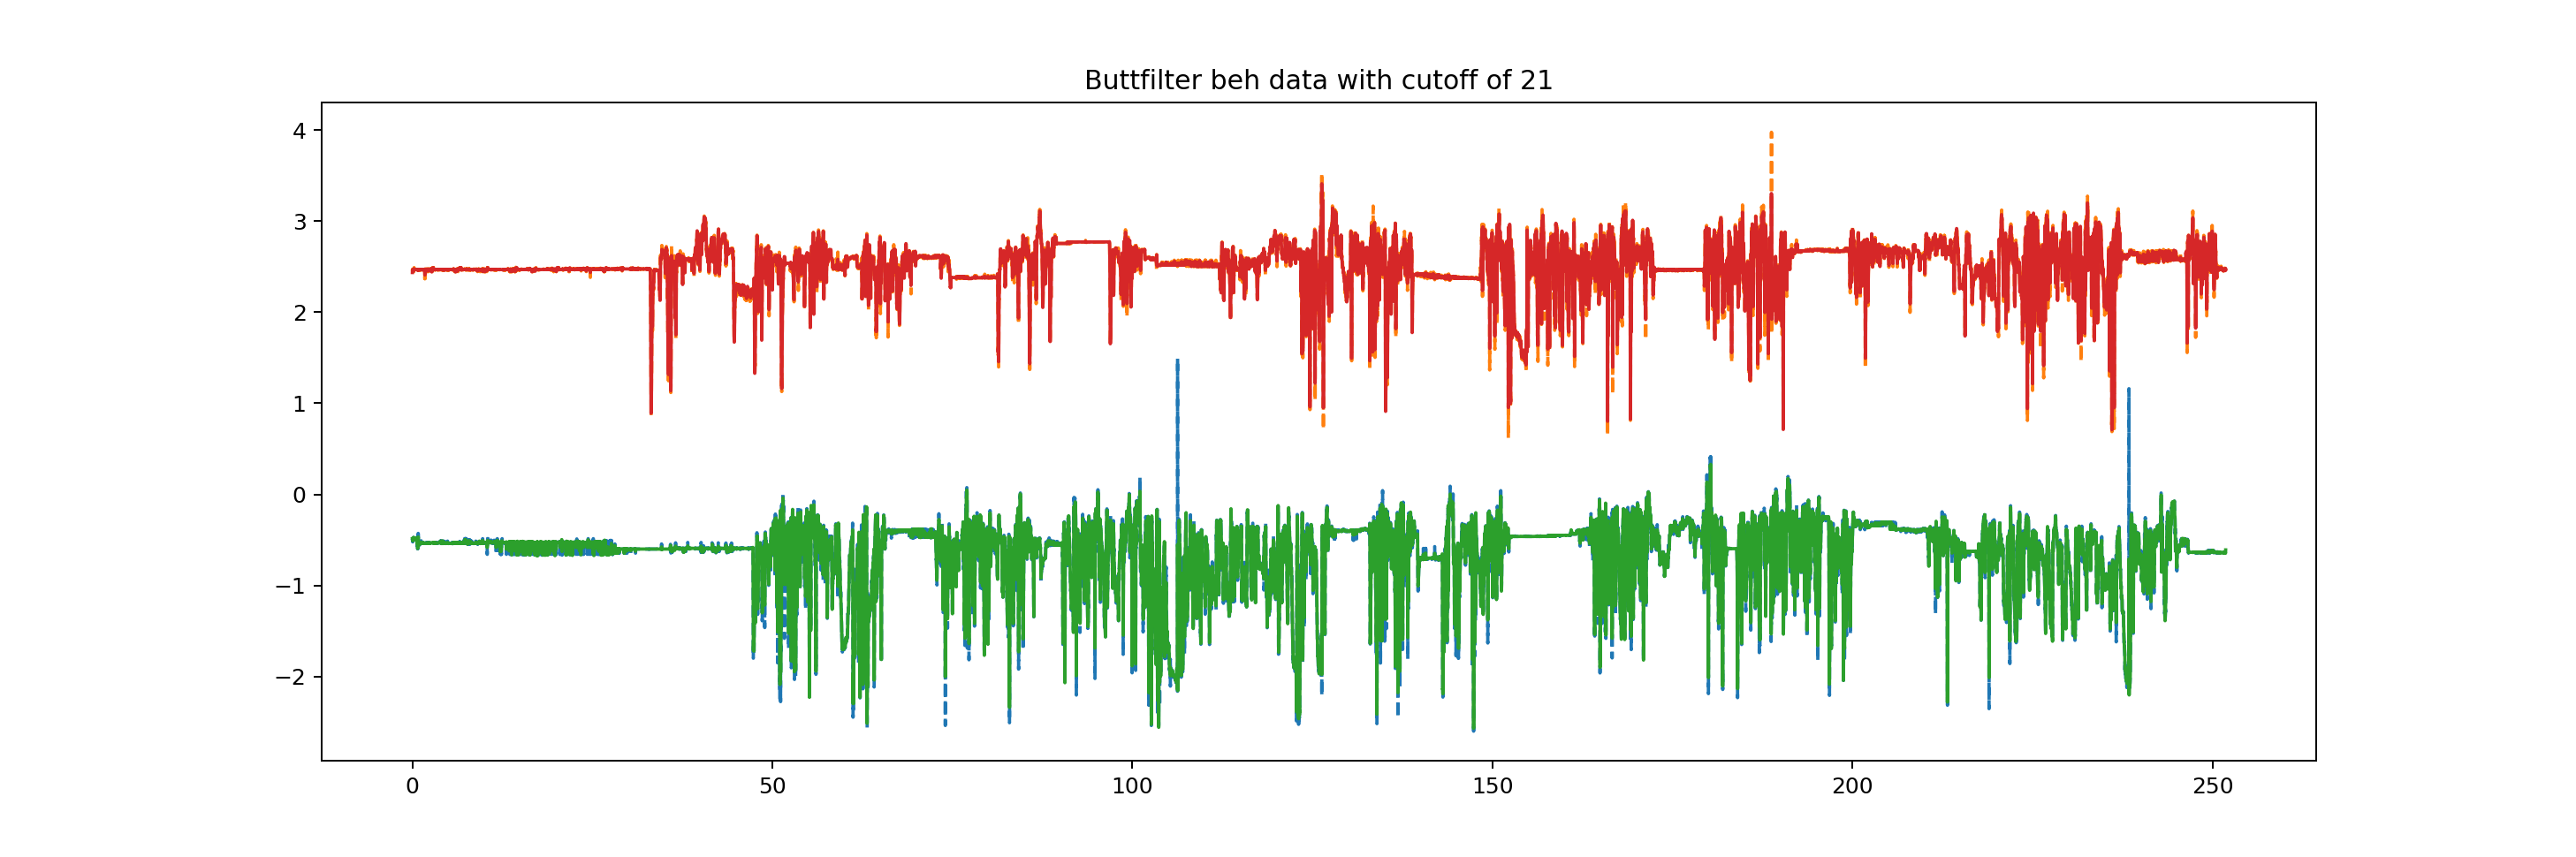

<IPython.core.display.Javascript object>


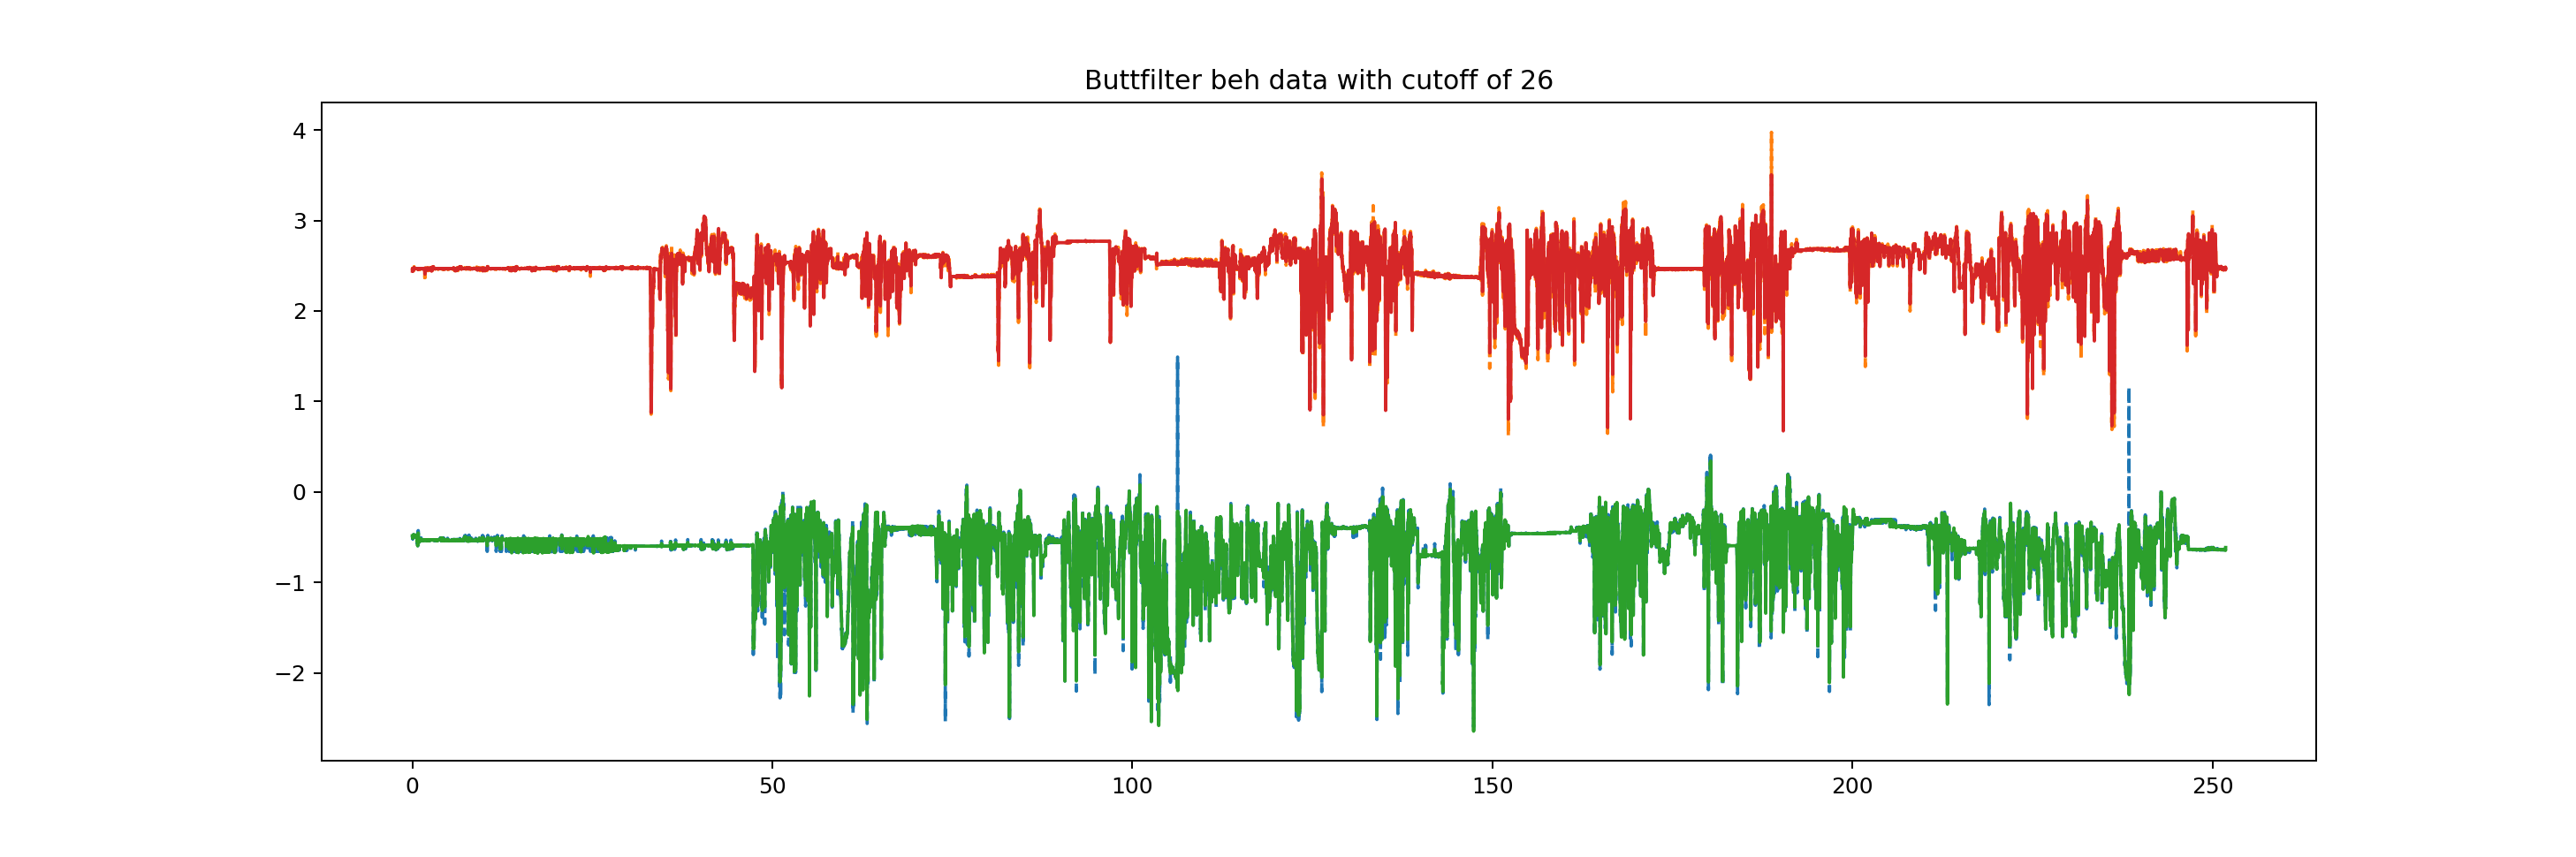

<IPython.core.display.Javascript object>


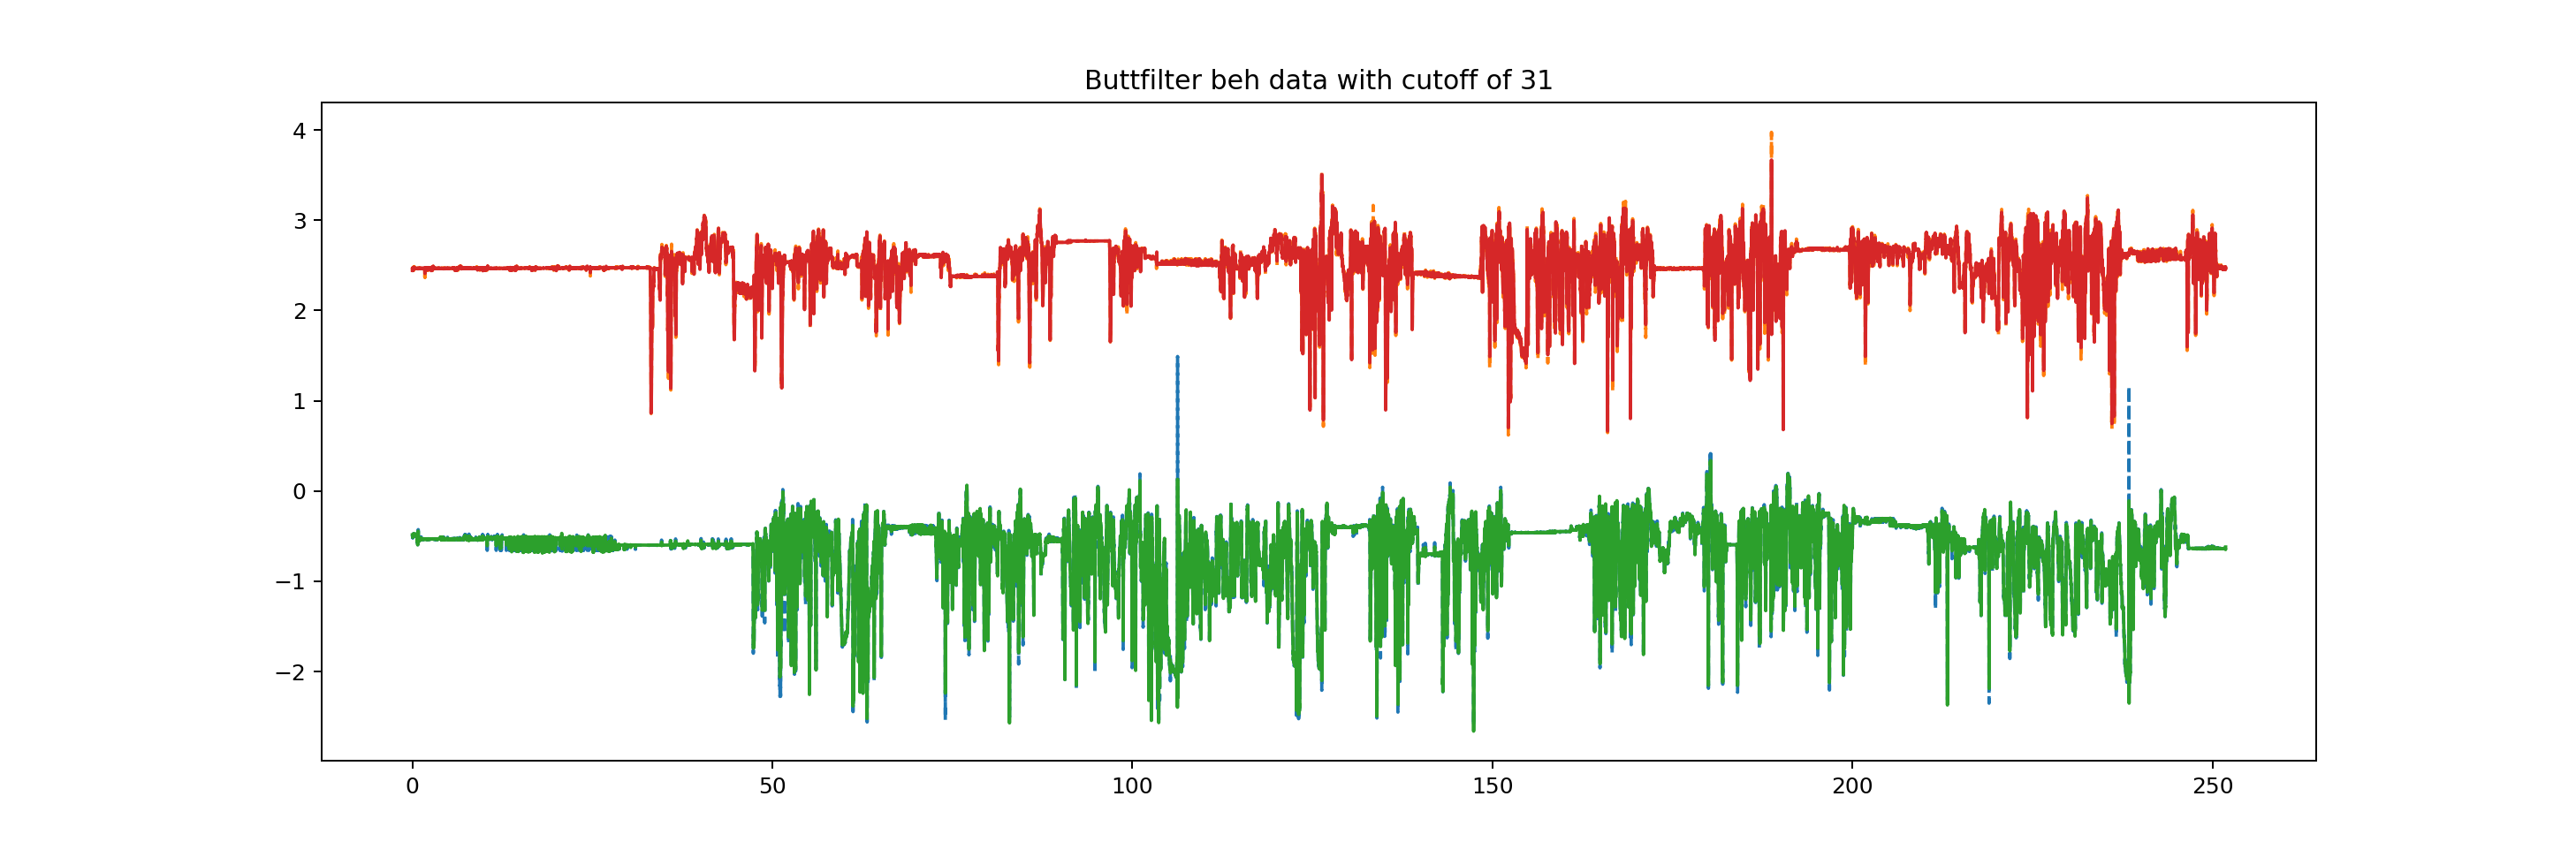

<IPython.core.display.Javascript object>


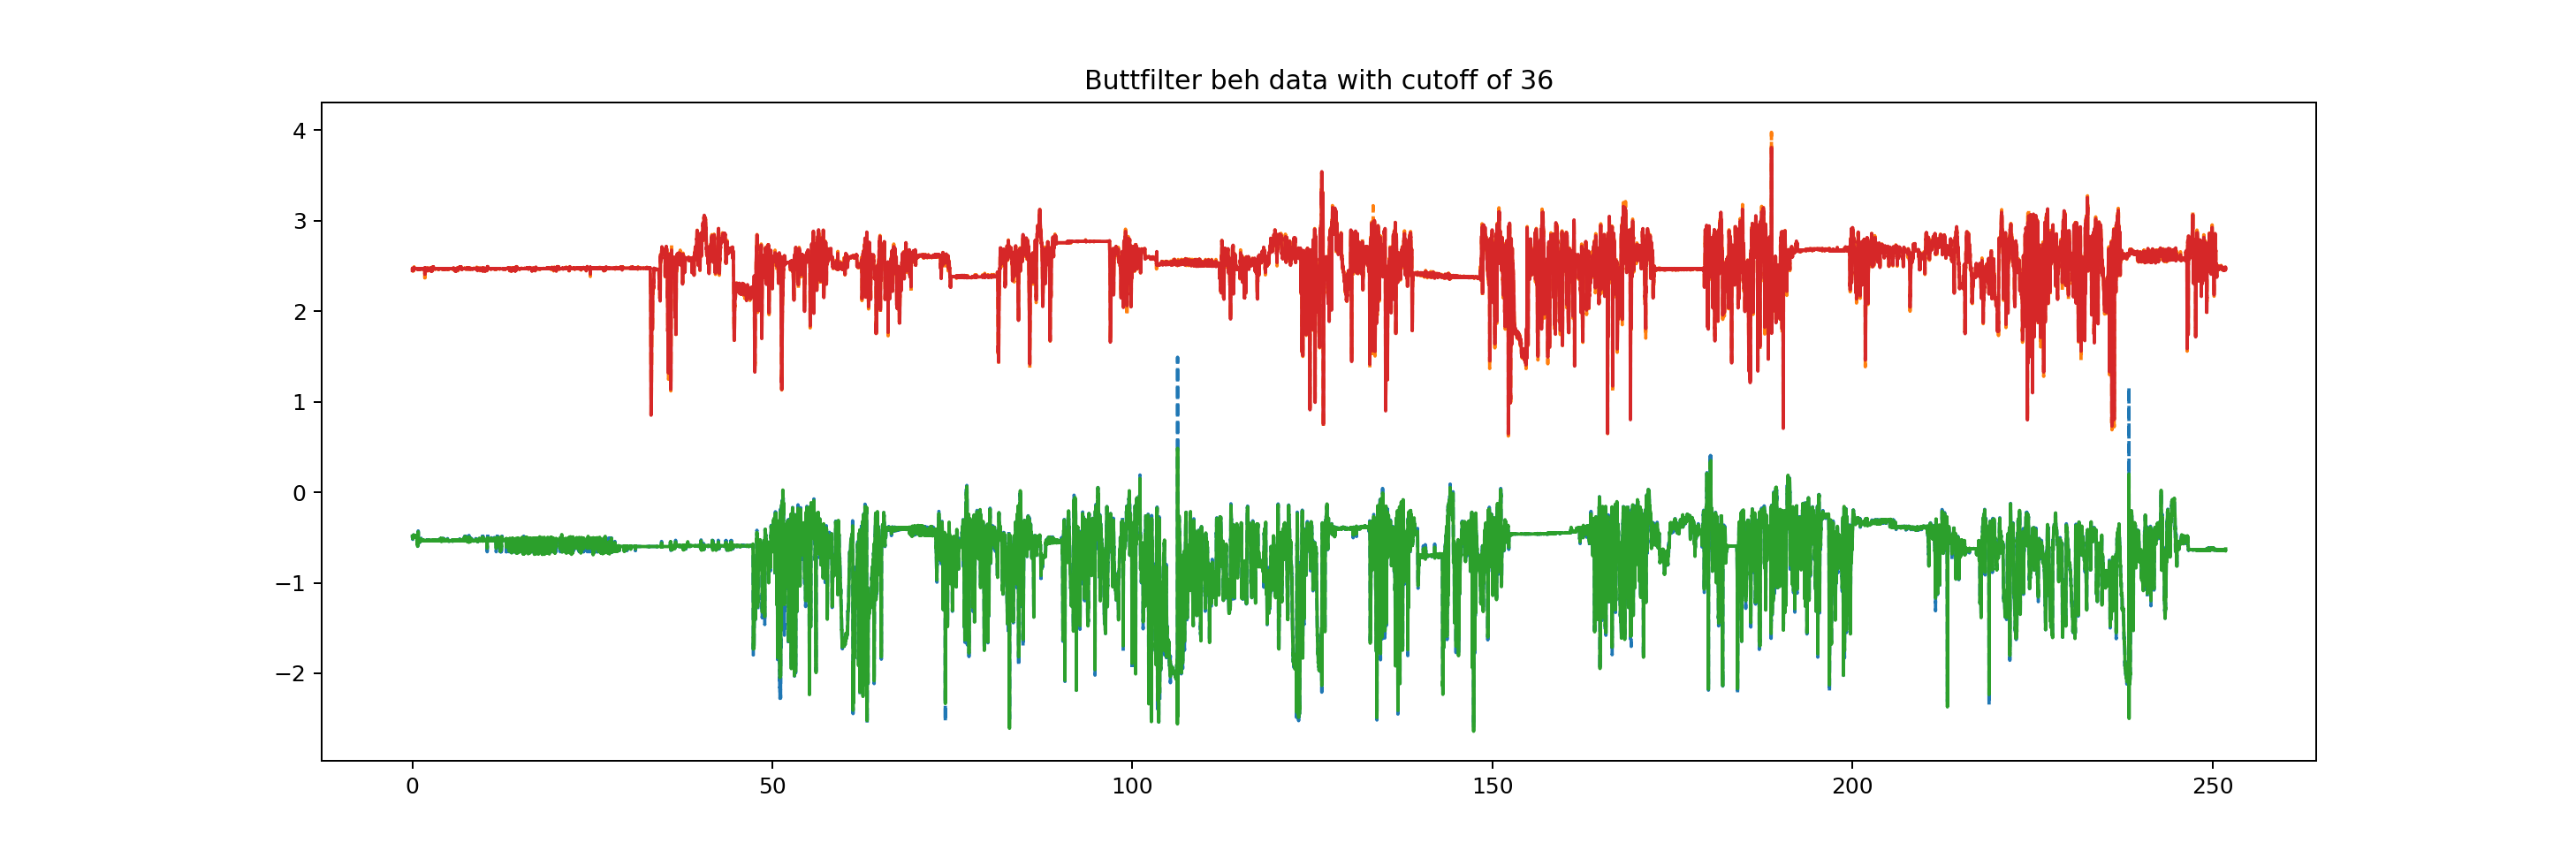

<IPython.core.display.Javascript object>


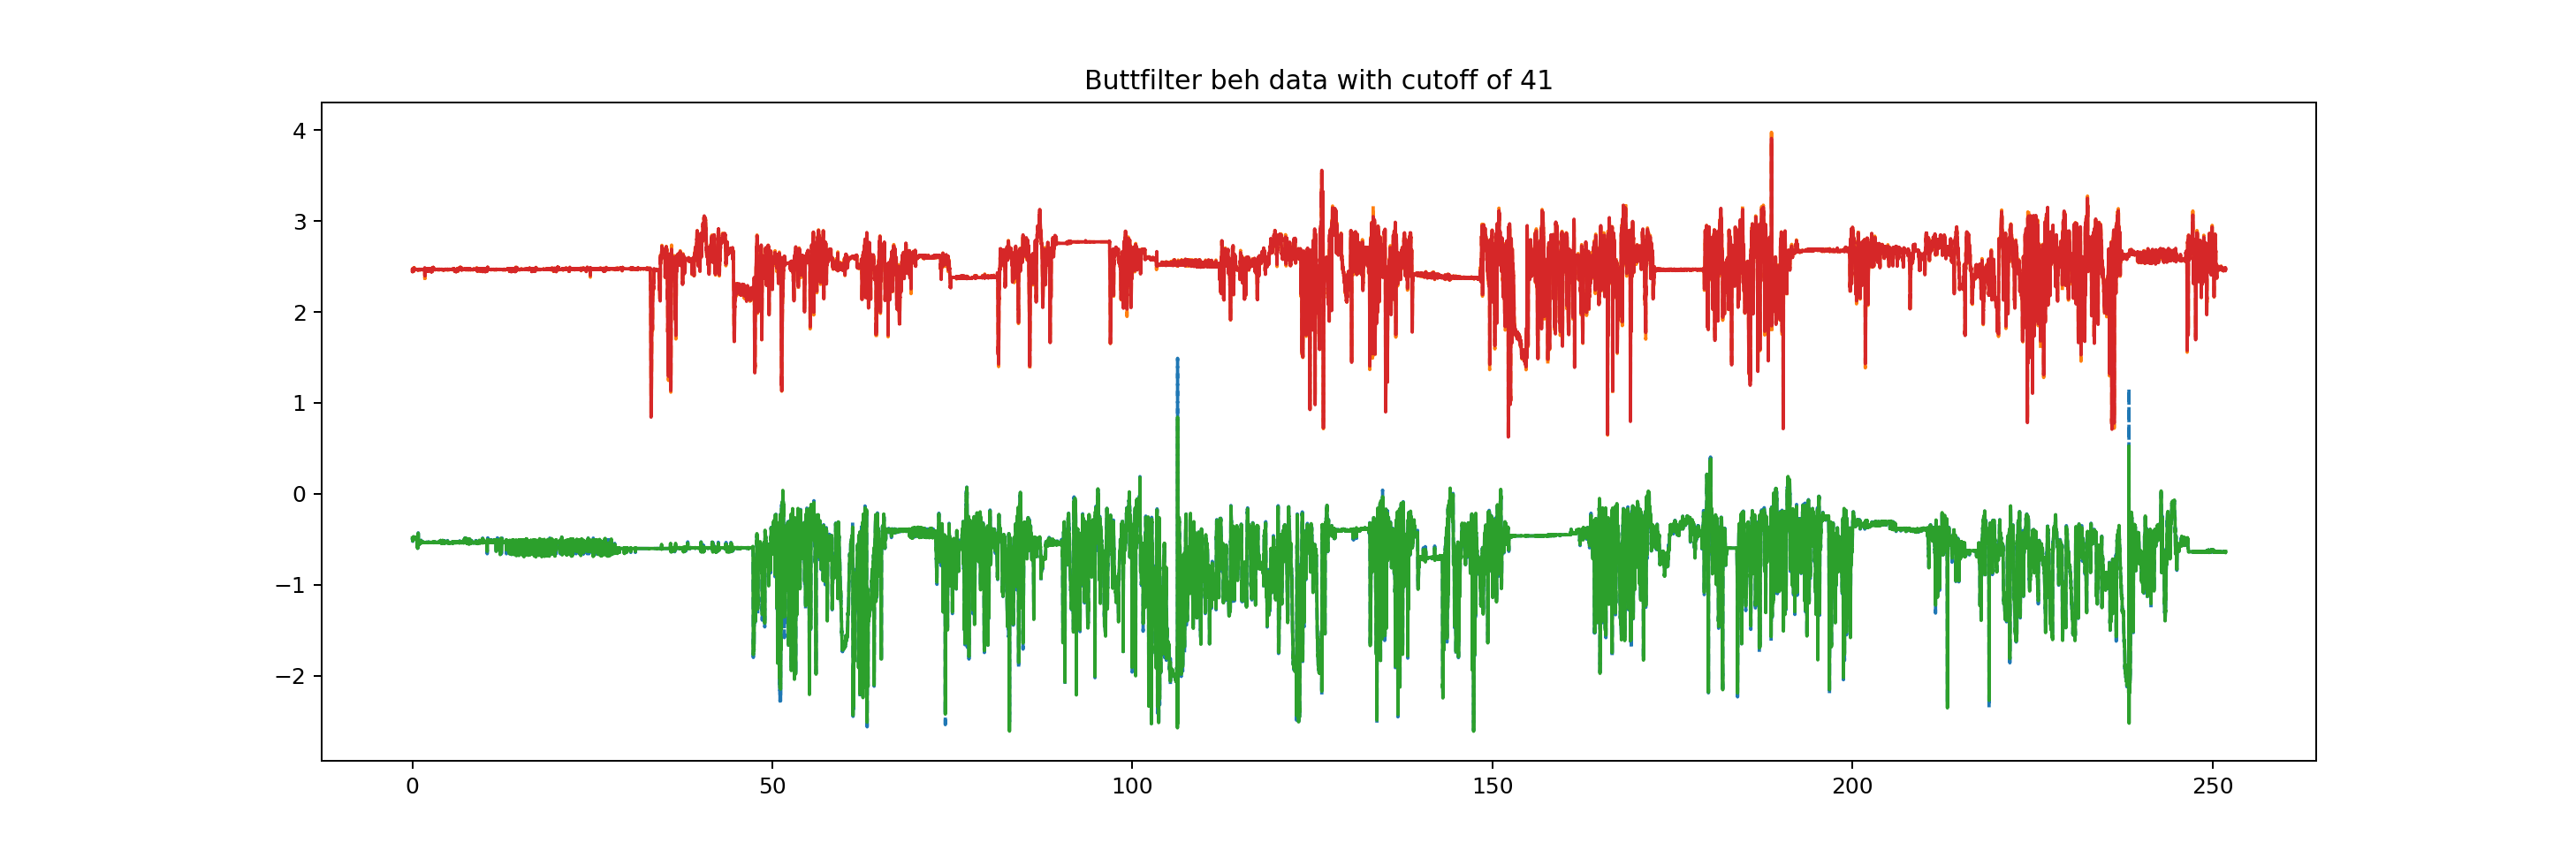

<IPython.core.display.Javascript object>


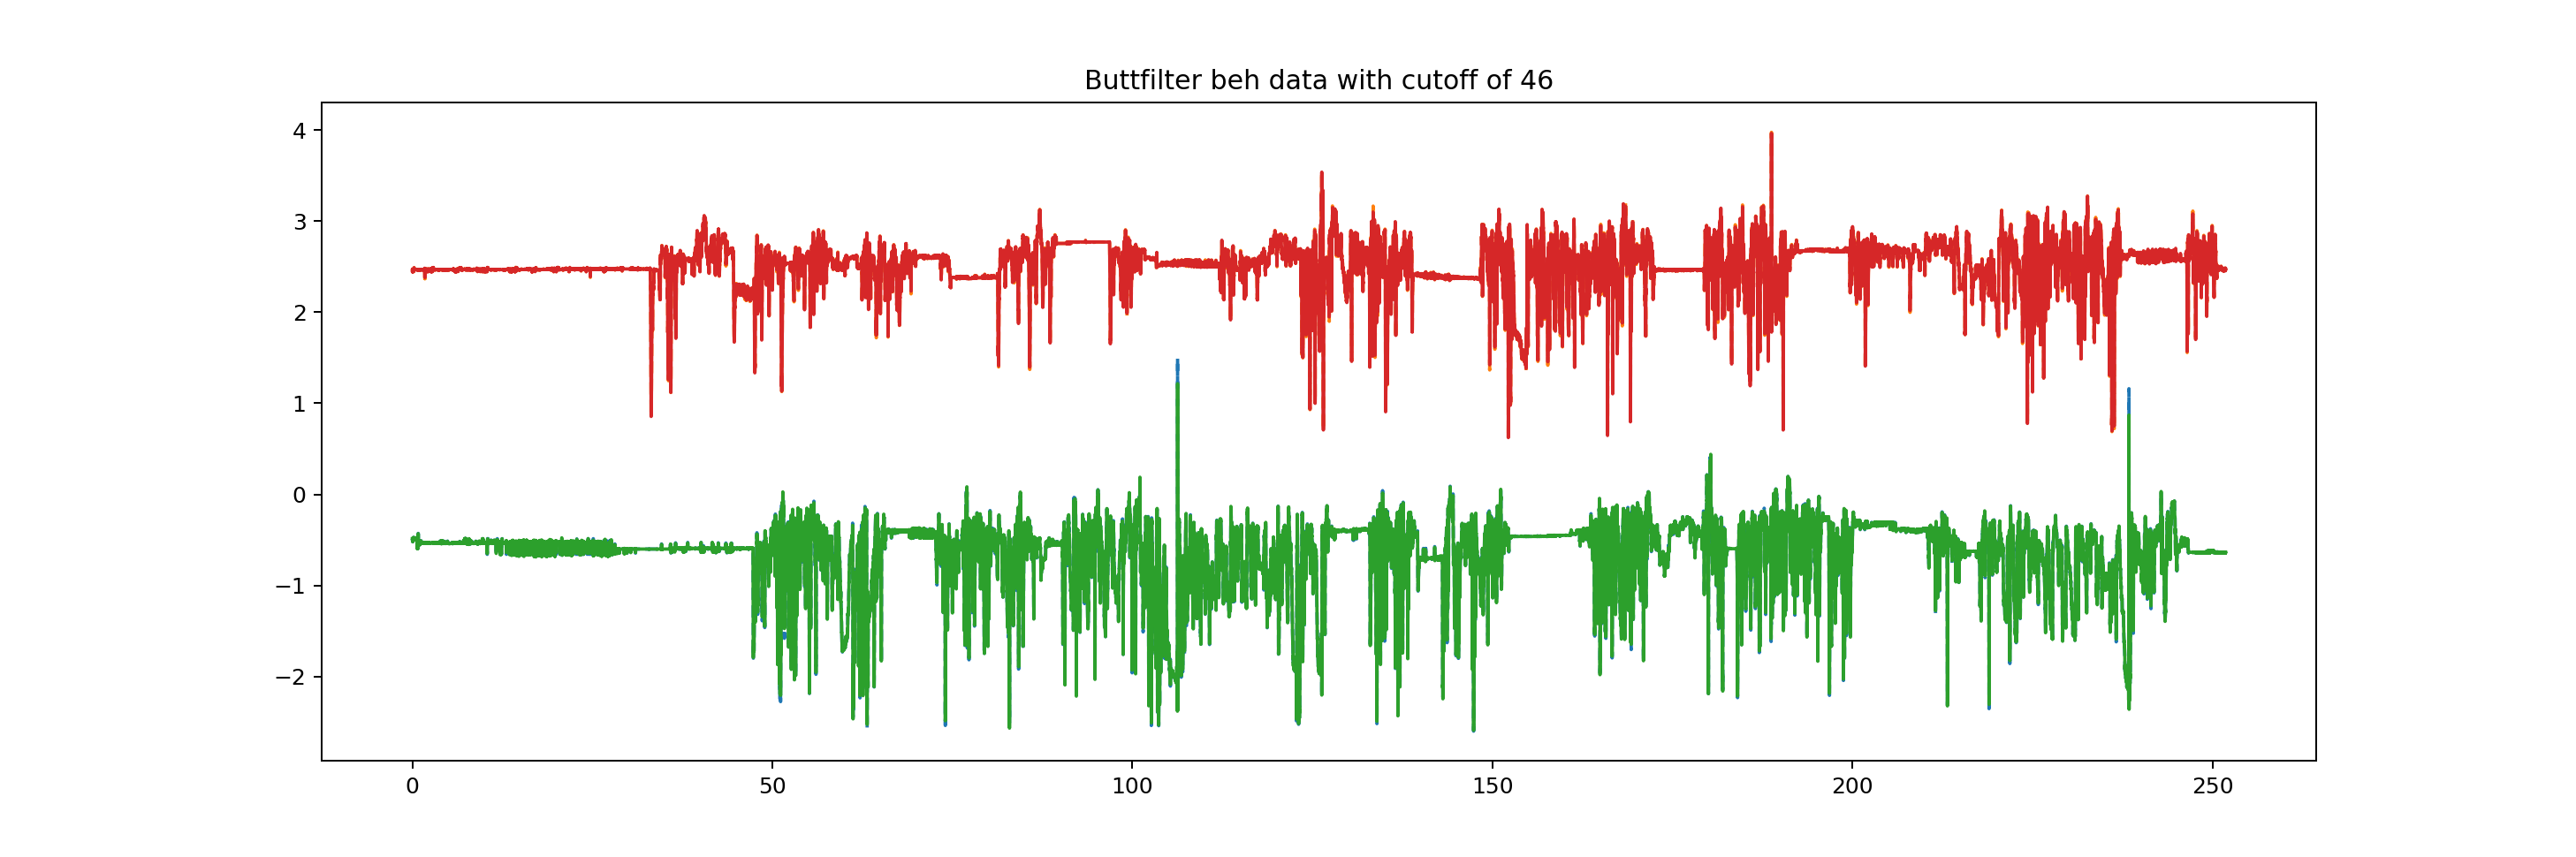

In [6]:
#behavioral noise filter
fs=100.0
order=2
cutoff=20
filtered_beh_df = beh_df.copy(deep=True)
#plot unifltered
angle_RF_leg_roll = beh_df["angle_RF_leg_Coxa_roll"]
time = beh_df["t"]
%matplotlib notebook
import mpld3
mpld3.enable_notebook()
ytick = []
rangefcut=range(1,49,5)
for cutoff in rangefcut:
    fig, ax = plt.subplots(figsize = (9,3))
    for i in range(2):
        y = angle_RF_leg_roll[angle_RF_leg_roll.index.get_level_values("Trial")==i]+3*i
        t=time[time.index.get_level_values("Trial")==i]
        plt.plot(t, y, alpha = 1, linestyle='dashed')
        ytick.append(angle_RF_leg_roll.iloc[0] + i*3)
    #superimposed filtered data
    filtered_beh_df_anglerf = butter_lowpass_filter(beh_df["angle_RF_leg_Coxa_roll"], cutoff, fs, order)
    filtered_beh_df.angle_RF_leg_Coxa_roll=filtered_beh_df_anglerf
    filtered_angle_RF_leg_roll = filtered_beh_df["angle_RF_leg_Coxa_roll"]
    time = filtered_beh_df["t"]
#fig, ax = plt.subplots(figsize = (15,8))
    ytick = []

    for i in range(2):
        y = filtered_angle_RF_leg_roll[filtered_angle_RF_leg_roll.index.get_level_values("Trial")==i]+3*i
        t=time[time.index.get_level_values("Trial")==i]
        plt.plot(t, y, alpha = 1) 
        ytick.append(filtered_angle_RF_leg_roll.iloc[0] + i*3)
        plt.title(f"Buttfilter beh data with cutoff of {cutoff}")
#ax.set_yticks(np.array(ytick))
#trial_names = ['trial_' + str(i) for i in range(12)]
#ax.set_yticklabels(trial_names)
#ax.set_ylabel('Angle (rad)')
#ax.set_xlabel('Time (sec)')
#ax.set_title('Coxa-roll angle of Right Front leg in different trials')
plt.show()
fig.savefig('report_images/buttfilt_Coxa-roll.png')

My part

In [4]:
#Δ𝐹/𝐹 = (F − Fb)/𝐹b , where Fb is the baseline fluorescence.
# return baselined neural data
def neural_dF_F(data):
    rlt_Df_f=data.copy(deep=True)
    nb_neurons = np.size(data,1)
    
    for j in np.arange(nb_neurons-1): 
        baseline = data['neuron_' + str(j)].rolling(window=3).mean()
        rlt_Df_f['neuron_' + str(j)] = (data['neuron_' + str(j)]-abs(baseline.min()))/abs(baseline.min())
    return rlt_Df_f

In [5]:
from scipy.signal import butter, filtfilt
def butter_lowpass_filter(data, cutoff, fs, order):
    """
    Apply a butterworth (lowpass) filter on the data for denoising according to the parameters given.
    Parameters
    ----------
    data : DataFrame
         The data to which you want to apply the noise filter.
    cutoff : float
        Cutoff frequency for your butterworth filter.
    fs : float
        Sampling frequency.
    order : integer
        Order of the filter.
    Returns
    -------
    reduced : numpy matrix
        Numpy matrix with denoised data accoding to the parameters given.
    """
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data, axis=0)
    return y

#filter angles in beh data
fs=100.0
order=2
cutoff=20
filtered_beh_df = beh_df.copy(deep=True) #necessary to deep copy dataframe
angl=beh_df.filter(regex="angle")
filtered_angl = butter_lowpass_filter(angl, cutoff, fs, order)
filtered_beh_df.iloc[:,2:44]=filtered_angl

#filter neurons reading in neural data
filtered_neural_df = neural_df.copy(deep=True)
fs=16.0
order=2
cutoff=2.5
neurons=neural_df.filter(regex="neuron")
filtered_neurons = butter_lowpass_filter(neurons, cutoff, fs, order)
filtered_neural_df.iloc[:,1:124]=filtered_neurons

filtered_neural_df = neural_dF_F(filtered_neural_df)
filtered_neural_df


t  neuron_0  neuron_1  neuron_2  \
Date   Genotype Fly Trial Frame                                             
210301 J1xCI9   1   0     0        1.846767  1.830262  2.302435  0.913503   
                          1        1.908333  1.896733  2.223851  0.915863   
                          2        1.969900  1.913865  2.196361  0.898505   
                          3        2.031467  1.874510  2.254948  0.856188   
                          4        2.093000  1.829596  2.342961  0.807146   
...                                     ...       ...       ...       ...   
                    11    4035   250.257500  2.437069  0.407765  3.851353   
                          4036   250.319067  2.403217  0.448867  3.802544   
                          4037   250.380600  2.407801  0.449155  3.788424   
                          4038   250.442167  2.478857  0.391827  3.878330   
                          4039   250.503733  2.599644  0.294782  4.069995   

                                 neuron_3  neuron_4  neuron_5  neuron_6  \
Date   Genotype Fly Trial Frame                                           
210301 J1xCI9   1   0     0      0.673424  0.507693  0.534641  0.236509   
                          1      0.671848  0.493673  0.499232  0.256947   
                          2      0.664598  0.482641  0.480229  0.269833   
                          3      0.656248  0.474498  0.475333  0.272971   
                          4      0.656803  0.469005  0.472947  0.271457   
...                                   ...       ...       ...       ...   
                    11    4035   6.076314  1.898427  1.288609  0.438098   
                          4036   6.119052  1.935560  1.366787  0.454012   
                          4037   6.119410  1.992323  1.448984  0.453758   
                          4038   6.055433  2.073192  1.518322  0.444656   
                          4039   5.925515  2.173827  1.578098  0.442154   

                                 neuron_7  neuron_8  ...  neuron_113  \
Date   Genotype Fly Trial Frame                      ...               
210301 J1xCI9   1   0     0      0.684245  0.588805  ...    1.076976   
                          1      0.655468  0.566063  ...    1.040678   
                          2      0.650144  0.549203  ...    1.008861   
                          3      0.660358  0.539477  ...    0.987256   
                          4      0.660709  0.538147  ...    0.976346   
...                                   ...       ...  ...         ...   
                    11    4035   4.608283  1.554365  ...    0.405355   
                          4036   4.642148  1.556720  ...    0.427632   
                          4037   4.652684  1.536832  ...    0.481182   
                          4038   4.582710  1.495086  ...    0.529576   
                          4039   4.433745  1.438210  ...    0.564194   

                                 neuron_114  neuron_115  neuron_116  \
Date   Genotype Fly Trial Frame                                       
210301 J1xCI9   1   0     0        0.768052    0.855806    1.114782   
                          1        0.731206    0.864005    1.142800   
                          2        0.700835    0.869347    1.150103   
                          3        0.681750    0.872432    1.129095   
                          4        0.673142    0.871986    1.090137   
...                                     ...         ...         ...   
                    11    4035     1.884477    0.786541    2.500893   
                          4036     1.969924    0.785018    2.515189   
                          4037     2.043410    0.785238    2.498330   
                          4038     2.112438    0.747801    2.455444   
                          4039     2.183506    0.665350    2.378206   

                                 neuron_117  neuron_118  neuron_119  \
Date   Genotype Fly Trial Frame                                       
210301 J1xCI9   1   0     0        2.053602    1.458494    2.

Part 2.2 week 10

In [6]:
def reduce_mean(values):
    return np.mean(values, axis=0)
def reduce_std(values):
    return np.std(values, axis=0)
def reduce_behaviour(values):
    """
    this is just a sketch for how to reduce behavioural classes. 
    It picks whatever behaviour occurs the most.
    Try to make this more stable, for example by handling the case when two behaviours are equally likely.
    You might also want to include a certainty threshold, 
    e.g. 3/4 of the behaviour frames have to be labelled the same way, otherwise it is None and the data is excluded
    """
    unique_values, N_per_unique = np.unique(values, return_counts=True)
    i_max = np.argmax(N_per_unique)

    #threshold = 0.75
    threshold = 4
    for idx, unique_value in enumerate(unique_values):
        if N_per_unique[idx] > threshold:
        #if N_per_unique[idx] > threshold * len(values):
            return unique_value
    return "nan"
# threshold = 0.75
# for idx, unique_value in enumerate(unique_values):
#     if N_per_unique[idx] > threshold * len(values):
#          return unique_value
#return None

def reduce_during_2p_frame(twop_index, values, function=reduce_mean):
    """
    Reduces all values occuring during the acquisition of a
    two-photon imaging frame to a single value using the `function` given by the user.
    Parameters
    ----------
    twop_index : numpy array
        1d array holding frame indices of one trial.
    values : numpy array
        Values upsampled to the frequency of ThorSync,
        i.e. 1D numpy array of the same length as
        `frame_counter` or 2D numpy array of the same length.
    function : function
        Function used to reduce the value,
        e.g. np.mean for 1D variables
    Returns
    -------
    reduced : numpy array
        Numpy array with value for each two-photon imaging frame.
    """
    
    if len(twop_index) != len(values):
        raise ValueError("twop_index and values need to have the same length.")
    if len(values.shape) == 1:
        values = np.expand_dims(values, axis=1) #basically puth them in a column
        squeeze = True
    else:
        squeeze = False
    N_samples, N_variables = values.shape
    
    index_unique = np.unique(twop_index)
    index_unique = np.delete(index_unique, index_unique==-9223372036854775808) #copy of it with the specified objects removed
    
    dtype = values.dtype
    if np.issubdtype(dtype, np.number):
        dtype = np.float
    else:
        dtype = np.object
    reduced = np.empty((len(index_unique), N_variables), dtype=dtype)

    for i, index in enumerate(index_unique):
        reduced[i] = function(values[twop_index==index, :])
        
    return np.squeeze(reduced) if squeeze else reduced

In [75]:
from collections import Counter
indx=[]
reduced=[]

In [76]:
#try out functions with beh categories
for j in range(0,12):
    twop_index = filtered_beh_df.loc[(210301, "J1xCI9",1,j), "twop_index"].to_numpy()
    values = filtered_beh_df.loc[(210301, "J1xCI9",1,j), "Manual"].to_numpy()
    reduced.append(reduce_during_2p_frame(twop_index, values, function=reduce_behaviour))
#print(Counter(reduced0))
#print(reduced0)
    indx.append(np.where(reduced[j] =='nan'))
#print(len(indx[0]))
    reduced[j] = reduced[j][reduced[j] != 'nan']
#print(Counter(reduced0))
#print(len(reduced0))

In [9]:
indx[0]

(array([   0,    1,    2, ..., 4037, 4038, 4039], dtype=int64),)

In [78]:
#filtered_neurons=sort_filtered_neural_df.loc[:,'neuron_21':'neuron_113']
for i in range(0,12):
    #sort_filtered_neural_df.drop(index=(210301, "J1xCI9", 1, i, indx[i][0].tolist()), inplace=True)
    #sort_filtered_neural_df.drop(index=(210301, "J1xCI9", 1, i, indx[i][0].tolist()), inplace=True)
    #df.loc[ind,:].index
    selection = sort_filtered_neural_df.loc[(210301, "J1xCI9", 1, i)]
    selection = sort_filtered_neural_df.iloc[indx[i]]
    sort_filtered_neural_df.drop(selection.index, inplace=True)
    #filtered_tr = filtered_tr.iloc[indx[i]]
    #filtered_neurons.loc[(210301, "J1xCI9", 1, i)] = filtered_tr
    #print(len(filtered_tr))
    #print(len(sort_filtered_neural_df))
#[df['column name'].map(len) < 2]

In [77]:
sorted_neurons=['neuron_21', 'neuron_58', 'neuron_82', 'neuron_92', 'neuron_14', 'neuron_38', 'neuron_51', 'neuron_12', 'neuron_10', 'neuron_48', 'neuron_118', 'neuron_105', 'neuron_11', 'neuron_116', 'neuron_91', 'neuron_34', 'neuron_85', 'neuron_114', 'neuron_115', 'neuron_22', 'neuron_23', 'neuron_5', 'neuron_32', 'neuron_20', 'neuron_121', 'neuron_26', 'neuron_120', 'neuron_79', 'neuron_99', 'neuron_101', 'neuron_96', 'neuron_8', 'neuron_97', 'neuron_73', 'neuron_33', 'neuron_47', 'neuron_25', 'neuron_9', 'neuron_36', 'neuron_57', 'neuron_29', 'neuron_100', 'neuron_93', 'neuron_28', 'neuron_117', 'neuron_35', 'neuron_60', 'neuron_56', 'neuron_90', 'neuron_68', 'neuron_49', 'neuron_75', 'neuron_4', 'neuron_62', 'neuron_46', 'neuron_102', 'neuron_16', 'neuron_88', 'neuron_65', 'neuron_54', 'neuron_106', 'neuron_78', 'neuron_17', 'neuron_103', 'neuron_89', 'neuron_63', 'neuron_41', 'neuron_24', 'neuron_77', 'neuron_107', 'neuron_15', 'neuron_83', 'neuron_84', 'neuron_71', 'neuron_31', 'neuron_1', 'neuron_42', 'neuron_39', 'neuron_94', 'neuron_0', 'neuron_74', 'neuron_76', 'neuron_70', 'neuron_37', 'neuron_6', 'neuron_66', 'neuron_30', 'neuron_72', 'neuron_13', 'neuron_18', 'neuron_108', 'neuron_44', 'neuron_3', 'neuron_50', 'neuron_104', 'neuron_69', 'neuron_86', 'neuron_111', 'neuron_43', 'neuron_113']
sort_filtered_neural_df=filtered_neural_df.reindex(columns=sorted_neurons)
sort_filtered_neural_df

neuron_21  neuron_58  neuron_82  neuron_92  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0       0.318577   0.577028   0.701083   0.364171   
                          1       0.335087   0.569102   0.647614   0.370210   
                          2       0.351363   0.571483   0.620407   0.368803   
                          3       0.363854   0.582141   0.616211   0.363200   
                          4       0.365302   0.586783   0.617443   0.361787   
...                                    ...        ...        ...        ...   
                    11    4035    0.928840   0.529797   0.833848   0.810034   
                          4036    0.896058   0.561794   0.892568   0.818491   
                          4037    0.861573   0.569366   0.933463   0.814140   
                          4038    0.839689   0.562377   0.925626   0.808921   
                          4039    0.824642   0.565353   0.876184   0.808979   

                                 neuron_14  neuron_38  neuron_51  neuron_12  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0       0.573358   0.483583   0.190515   0.494567   
                          1       0.599533   0.486479   0.231991   0.469153   
                          2       0.611120   0.479230   0.252516   0.450740   
                          3       0.604687   0.465959   0.251577   0.446185   
                          4       0.588363   0.456616   0.242836   0.450911   
...                                    ...        ...        ...        ...   
                    11    4035    1.779669   1.628995   0.910157   2.107102   
                          4036    1.755210   1.628647   0.915487   2.097252   
                          4037    1.724616   1.647448   0.950121   2.050421   
                          4038    1.720158   1.683744   0.995809   2.051767   
                          4039    1.746897   1.722045   1.031271   2.128350   

                                 neuron_10  neuron_48  ...  neuron_108  \
Date   Genotype Fly Trial Frame                        ...               
210301 J1xCI9   1   0     0       0.218194   0.468060  ...    0.583090   
                          1       0.256498   0.461287  ...    0.563702   
                          2       0.268329   0.452161  ...    0.544293   
                          3       0.260594   0.443611  ...    0.530457   
                          4       0.249975   0.437240  ...    0.525617   
...                                    ...        ...  ...         ...   
                    11    4035    0.687161   1.572850  ...    1.505551   
                          4036    0.691659   1.691234  ...    1.514016   
                          4037    0.695724   1.738233  ...    1.521249   
                          4038    0.691142   1.649397  ...    1.496838   
                          4039    0.675036   1.451662  ...    1.437153   

                                 neuron_44  neuron_3  neuron_50  neuron_104  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0       1.558347  0.673424   1.147128    1.343664   
                          1       1.701776  0.671848   1.169191    1.312721   
                          2       1.784226  0.664598   1.180524    1.289817   
                          3       1.791340  0.656248   1.182573    1.282971   
                          4       1.760888  0.656803   1.181845    1.298253   
...                                    ...       ...        ...         ...   
                    11    4035    1.946301  6.076314   0.716369    1.125851   
                          4036    2.055568  6.119052   0.716945    1.146462   
                          4037    2.137911  6.119410   0.712650    1.152585   
                          4038    2.194238  6.055433   0.695235    1.163758   
                          4039    2.244026  5.925515   0.663074   

In [59]:
indx[1][0]

array([   0,    1,    2, ..., 4036, 4037, 4038], dtype=int64)

In [79]:
sort_filtered_neural_df

neuron_21  neuron_58  neuron_82  neuron_92  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0       0.318577   0.577028   0.701083   0.364171   
                          1       0.335087   0.569102   0.647614   0.370210   
                          2       0.351363   0.571483   0.620407   0.368803   
                          3       0.363854   0.582141   0.616211   0.363200   
                          4       0.365302   0.586783   0.617443   0.361787   
...                                    ...        ...        ...        ...   
                    11    4035    0.928840   0.529797   0.833848   0.810034   
                          4036    0.896058   0.561794   0.892568   0.818491   
                          4037    0.861573   0.569366   0.933463   0.814140   
                          4038    0.839689   0.562377   0.925626   0.808921   
                          4039    0.824642   0.565353   0.876184   0.808979   

                                 neuron_14  neuron_38  neuron_51  neuron_12  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0       0.573358   0.483583   0.190515   0.494567   
                          1       0.599533   0.486479   0.231991   0.469153   
                          2       0.611120   0.479230   0.252516   0.450740   
                          3       0.604687   0.465959   0.251577   0.446185   
                          4       0.588363   0.456616   0.242836   0.450911   
...                                    ...        ...        ...        ...   
                    11    4035    1.779669   1.628995   0.910157   2.107102   
                          4036    1.755210   1.628647   0.915487   2.097252   
                          4037    1.724616   1.647448   0.950121   2.050421   
                          4038    1.720158   1.683744   0.995809   2.051767   
                          4039    1.746897   1.722045   1.031271   2.128350   

                                 neuron_10  neuron_48  ...  neuron_108  \
Date   Genotype Fly Trial Frame                        ...               
210301 J1xCI9   1   0     0       0.218194   0.468060  ...    0.583090   
                          1       0.256498   0.461287  ...    0.563702   
                          2       0.268329   0.452161  ...    0.544293   
                          3       0.260594   0.443611  ...    0.530457   
                          4       0.249975   0.437240  ...    0.525617   
...                                    ...        ...  ...         ...   
                    11    4035    0.687161   1.572850  ...    1.505551   
                          4036    0.691659   1.691234  ...    1.514016   
                          4037    0.695724   1.738233  ...    1.521249   
                          4038    0.691142   1.649397  ...    1.496838   
                          4039    0.675036   1.451662  ...    1.437153   

                                 neuron_44  neuron_3  neuron_50  neuron_104  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0       1.558347  0.673424   1.147128    1.343664   
                          1       1.701776  0.671848   1.169191    1.312721   
                          2       1.784226  0.664598   1.180524    1.289817   
                          3       1.791340  0.656248   1.182573    1.282971   
                          4       1.760888  0.656803   1.181845    1.298253   
...                                    ...       ...        ...         ...   
                    11    4035    1.946301  6.076314   0.716369    1.125851   
                          4036    2.055568  6.119052   0.716945    1.146462   
                          4037    2.137911  6.119410   0.712650    1.152585   
                          4038    2.194238  6.055433   0.695235    1.163758   
                          4039    2.244026  5.925515   0.663074   

In [13]:
sorted_neurons=['neuron_21', 'neuron_58', 'neuron_82', 'neuron_92', 'neuron_14', 'neuron_38', 'neuron_51', 'neuron_12', 'neuron_10', 'neuron_48', 'neuron_118', 'neuron_105', 'neuron_11', 'neuron_116', 'neuron_91', 'neuron_34', 'neuron_85', 'neuron_114', 'neuron_115', 'neuron_22', 'neuron_23', 'neuron_5', 'neuron_32', 'neuron_20', 'neuron_121', 'neuron_26', 'neuron_120', 'neuron_79', 'neuron_99', 'neuron_101', 'neuron_96', 'neuron_8', 'neuron_97', 'neuron_73', 'neuron_33', 'neuron_47', 'neuron_25', 'neuron_9', 'neuron_36', 'neuron_57', 'neuron_29', 'neuron_100', 'neuron_93', 'neuron_28', 'neuron_117', 'neuron_35', 'neuron_60', 'neuron_56', 'neuron_90', 'neuron_68', 'neuron_49', 'neuron_75', 'neuron_4', 'neuron_62', 'neuron_46', 'neuron_102', 'neuron_16', 'neuron_88', 'neuron_65', 'neuron_54', 'neuron_106', 'neuron_78', 'neuron_17', 'neuron_103', 'neuron_89', 'neuron_63', 'neuron_41', 'neuron_24', 'neuron_77', 'neuron_107', 'neuron_15', 'neuron_83', 'neuron_84', 'neuron_71', 'neuron_31', 'neuron_1', 'neuron_42', 'neuron_39', 'neuron_94', 'neuron_0', 'neuron_74', 'neuron_76', 'neuron_70', 'neuron_37', 'neuron_6', 'neuron_66', 'neuron_30', 'neuron_72', 'neuron_13', 'neuron_18', 'neuron_108', 'neuron_44', 'neuron_3', 'neuron_50', 'neuron_104', 'neuron_69', 'neuron_86', 'neuron_111', 'neuron_43', 'neuron_113']
sort_filtered_neural_df=filtered_neural_df.reindex(columns=sorted_neurons)
filtered_neurons=sort_filtered_neural_df.loc[:,'neuron_21':'neuron_113']
filtered_tr0=filtered_neurons.loc[(210301, "J1xCI9", 1, 0)]
filtered_tr0
filtered_tr0.iloc[indx[0]]

neuron_21  neuron_58  neuron_82  neuron_92  neuron_14  neuron_38  \
Frame                                                                     
0       0.318577   0.577028   0.701083   0.364171   0.573358   0.483583   
1       0.335087   0.569102   0.647614   0.370210   0.599533   0.486479   
2       0.351363   0.571483   0.620407   0.368803   0.611120   0.479230   
3       0.363854   0.582141   0.616211   0.363200   0.604687   0.465959   
4       0.365302   0.586783   0.617443   0.361787   0.588363   0.456616   
...          ...        ...        ...        ...        ...        ...   
4035    0.146040   0.405643   0.328418   0.170220   0.235059   0.317769   
4036    0.154142   0.396591   0.330902   0.178006   0.221450   0.319415   
4037    0.169714   0.386849   0.333125   0.185784   0.227674   0.317707   
4038    0.182832   0.377952   0.318179   0.185819   0.258354   0.307019   
4039    0.188478   0.367360   0.281965   0.180973   0.302567   0.286515   

       neuron_51  neuron_12  neuron_10  neuron_48  ...  neuron_108  neuron_44  \
Frame                                              ...                          
0       0.190515   0.494567   0.218194   0.468060  ...    0.583090   1.558347   
1       0.231991   0.469153   0.256498   0.461287  ...    0.563702   1.701776   
2       0.252516   0.450740   0.268329   0.452161  ...    0.544293   1.784226   
3       0.251577   0.446185   0.260594   0.443611  ...    0.530457   1.791340   
4       0.242836   0.450911   0.249975   0.437240  ...    0.525617   1.760888   
...          ...        ...        ...        ...  ...         ...        ...   
4035    0.142032   0.190723   0.283740   0.273019  ...    0.341413   1.129180   
4036    0.129139   0.182789   0.278867   0.271550  ...    0.336058   1.115203   
4037    0.124925   0.178345   0.260620   0.266418  ...    0.331851   1.119260   
4038    0.131625   0.182384   0.235834   0.250601  ...    0.334355   1.124034   
4039    0.143604   0.207258   0.209795   0.225816  ...    0.349446   1.114899   

       neuron_3  neuron_50  neuron_104  neuron_69  neuron_86  neuron_111  \
Frame                                                                      
0      0.673424   1.147128    1.343664   0.719369   0.405738    1.495974   
1      0.671848   1.169191    1.312721   0.781828   0.369396    1.458451   
2      0.664598   1.180524    1.289817   0.806331   0.353849    1.424745   
3      0.656248   1.182573    1.282971   0.795175   0.355366    1.400859   
4      0.656803   1.181845    1.298253   0.778861   0.358566    1.392311   
...         ...        ...         ...        ...        ...         ...   
4035   0.845860   1.013885    1.879774   0.530895   0.289209    1.036933   
4036   0.829656   1.018423    1.900431   0.528453   0.285173    1.034045   
4037   0.835112   1.009025    1.883349   0.541670   0.278124    1.033745   
4038   0.852902   0.973749    1.739263   0.591719   0.280129    1.014268   
4039   0.878494   0.905416    1.426899   0.695243   0.296269    0.972107   

       neuron_43  neuron_113  
Frame                         
0       0.862322    1.076976  
1       0.882671    1.040678  
2       0.889078    1.008861  
3       0.882611    0.987256  
4       0.878186    0.976346  
...          ...         ...  
4035    0.533210    0.516469  
4036    0.526747    0.519820  
4037    0.527067    0.508472  
4038    0.532568    0.468577  
4039    0.526500    0.386643  

[3950 rows x 100 columns]

In [21]:
len(filtered_neurons)

48480

In [49]:
twop_index = filtered_beh_df.loc[(210301, "J1xCI9", 1,1), "twop_index"].to_numpy()
values = filtered_beh_df.loc[(210301, "J1xCI9", 1,1), "Manual"].to_numpy()
reduced1 = reduce_during_2p_frame(twop_index, values, function=reduce_behaviour)
indx1=np.where(reduced0=='nan')
reduced1 = reduced0[reduced0 != 'nan']
#print(len(values)) #check length
twop_index = filtered_beh_df.loc[(210301, "J1xCI9", 1,2), "twop_index"].to_numpy()
values = filtered_beh_df.loc[(210301, "J1xCI9", 1,2), "Manual"].to_numpy()
reduced2 = reduce_during_2p_frame(twop_index, values, function=reduce_behaviour)
#print(len(values)) #check length
twop_index = filtered_beh_df.loc[(210301, "J1xCI9", 1,3), "twop_index"].to_numpy()
values = filtered_beh_df.loc[(210301, "J1xCI9", 1,3), "Manual"].to_numpy()
reduced3 = reduce_during_2p_frame(twop_index, values, function=reduce_behaviour)
twop_index = filtered_beh_df.loc[(210301, "J1xCI9", 1,4), "twop_index"].to_numpy()
values = filtered_beh_df.loc[(210301, "J1xCI9", 1,4), "Manual"].to_numpy()
reduced4 = reduce_during_2p_frame(twop_index, values, function=reduce_behaviour)
twop_index = filtered_beh_df.loc[(210301, "J1xCI9", 1,5), "twop_index"].to_numpy()
values = filtered_beh_df.loc[(210301, "J1xCI9", 1,5), "Manual"].to_numpy()
reduced5 = reduce_during_2p_frame(twop_index, values, function=reduce_behaviour)
twop_index = filtered_beh_df.loc[(210301, "J1xCI9", 1,6), "twop_index"].to_numpy()
values = filtered_beh_df.loc[(210301, "J1xCI9", 1,6), "Manual"].to_numpy()
reduced6 = reduce_during_2p_frame(twop_index, values, function=reduce_behaviour)
twop_index = filtered_beh_df.loc[(210301, "J1xCI9", 1,7), "twop_index"].to_numpy()
values = filtered_beh_df.loc[(210301, "J1xCI9", 1,7), "Manual"].to_numpy()
reduced7 = reduce_during_2p_frame(twop_index, values, function=reduce_behaviour)
twop_index = filtered_beh_df.loc[(210301, "J1xCI9", 1,8), "twop_index"].to_numpy()
values = filtered_beh_df.loc[(210301, "J1xCI9", 1,8), "Manual"].to_numpy()
reduced8 = reduce_during_2p_frame(twop_index, values, function=reduce_behaviour)
twop_index = filtered_beh_df.loc[(210301, "J1xCI9", 1,9), "twop_index"].to_numpy()
values = filtered_beh_df.loc[(210301, "J1xCI9", 1,9), "Manual"].to_numpy()
reduced9 = reduce_during_2p_frame(twop_index, values, function=reduce_behaviour)
twop_index = filtered_beh_df.loc[(210301, "J1xCI9", 1,10), "twop_index"].to_numpy()
values = filtered_beh_df.loc[(210301, "J1xCI9", 1,10), "Manual"].to_numpy()
reduced10 = reduce_during_2p_frame(twop_index, values, function=reduce_behaviour)
twop_index = filtered_beh_df.loc[(210301, "J1xCI9", 1,11), "twop_index"].to_numpy()
values = filtered_beh_df.loc[(210301, "J1xCI9", 1,11), "Manual"].to_numpy()
reduced11 = reduce_during_2p_frame(twop_index, values, function=reduce_behaviour)
reduced=np.concatenate((reduced0,reduced1,reduced2,reduced3,reduced4,reduced5,reduced6,reduced7,reduced8,reduced9,reduced10,reduced11),axis=None)
print(reduced)

['resting' 'resting' 'resting' ... 'walking' 'walking' 'walking']


In [50]:
# prepare binary variable for walking to indicate whether fly is walking or not
bin_var_walk=np.where(reduced=='walking',1,0)
bin_var_walk= bin_var_walk.tolist()
print(len(bin_var_walk)) #check if length matches

48480


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from collections import Counter
import seaborn as sns

In [64]:
def logreg_1binvar(X,y):   
    """
    Uses logistic regression with one or multiple neuron's activities as input and binary variable that indicates
    whether the fly is exhibiting a certain behavior or not as output of the model.
    First the datset is stratified split into train and test then some preprocessing is done. The classifier
    is built, trained and then the predictions are made on the test data with a brief visualization of the
    prediction given.
    A classification report is then given which gives a measure of the quality of the prediction from the 
    classificatio algorithm. A confusion matrix is plotted in order to give a visualization of the results.
    Parameters
    ----------
    X : numpy matrix
        Matrix holding the regressors.
    y : numpy list
        List holding all the behavioral labels
    Returns
    -------
    model : sklearn object
        Logistic regression model.
    """
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    
    #preprocessing
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    #check the proportions of the two labels in the train and test, stratify assures proportions are the same
    #if not stratified and the two labels have very different quantities in the test or train
    #there may not be any of one of the two labels making the training unconclusive
    print(Counter(y_train))
    print(Counter(y_test))
    
    #build the classifier and train it
    model = LogisticRegression(random_state=10) #fixed random state
    model.fit(X_train, y_train)
    
    #make prediction and print classification report
    y_pred = pd.Series(model.predict(X_test))
    y_test = pd.Series(y_test)
    z = pd.concat([y_test, y_pred], axis=1)
    z.columns = ['True', 'Prediction']
    print(z.head())
    print(metrics.classification_report(y_test, y_pred))
    
    #get confusion matrix and print it
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    labels = [0, 1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    return model

Counter({1: 19558, 0: 19226})
Counter({1: 4889, 0: 4807})
   True  Prediction
0     0           0
1     0           0
2     1           0
3     1           0
4     0           0
              precision    recall  f1-score   support

           0       0.61      0.65      0.63      4807
           1       0.63      0.59      0.61      4889

    accuracy                           0.62      9696
   macro avg       0.62      0.62      0.62      9696
weighted avg       0.62      0.62      0.62      9696



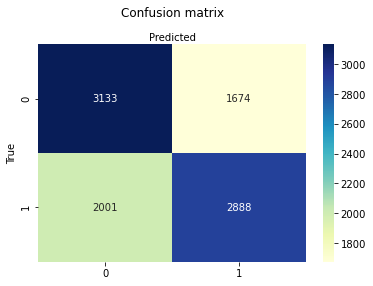

In [65]:
#choose a random neuron for the predction of the binary walking behavior
neuron_15 = filtered_neural_df.loc[(210301, "J1xCI9", 1), "neuron_15"]
X=np.expand_dims(neuron_15, axis=1)

#make prediction with classifier
log_reg_walk= logreg_1binvar(X,bin_var_walk)

As we can see the prediction is quite poor.

In [66]:
#now try to slowly add more neurons sorted by their correlation coefficient with the binary 'walking variable'
#the neurons are sorted in decreasing order
sorted_neurons=['neuron_21', 'neuron_58', 'neuron_82', 'neuron_92', 'neuron_14', 'neuron_38', 'neuron_51', 'neuron_12', 'neuron_10', 'neuron_48', 'neuron_118', 'neuron_105', 'neuron_11', 'neuron_116', 'neuron_91', 'neuron_34', 'neuron_85', 'neuron_114', 'neuron_115', 'neuron_22', 'neuron_23', 'neuron_5', 'neuron_32', 'neuron_20', 'neuron_121', 'neuron_26', 'neuron_120', 'neuron_79', 'neuron_99', 'neuron_101', 'neuron_96', 'neuron_8', 'neuron_97', 'neuron_73', 'neuron_33', 'neuron_47', 'neuron_25', 'neuron_9', 'neuron_36', 'neuron_57', 'neuron_29', 'neuron_100', 'neuron_93', 'neuron_28', 'neuron_117', 'neuron_35', 'neuron_60', 'neuron_56', 'neuron_90', 'neuron_68', 'neuron_49', 'neuron_75', 'neuron_4', 'neuron_62', 'neuron_46', 'neuron_102', 'neuron_16', 'neuron_88', 'neuron_65', 'neuron_54', 'neuron_106', 'neuron_78', 'neuron_17', 'neuron_103', 'neuron_89', 'neuron_63', 'neuron_41', 'neuron_24', 'neuron_77', 'neuron_107', 'neuron_15', 'neuron_83', 'neuron_84', 'neuron_71', 'neuron_31', 'neuron_1', 'neuron_42', 'neuron_39', 'neuron_94', 'neuron_0', 'neuron_74', 'neuron_76', 'neuron_70', 'neuron_37', 'neuron_6', 'neuron_66', 'neuron_30', 'neuron_72', 'neuron_13', 'neuron_18', 'neuron_108', 'neuron_44', 'neuron_3', 'neuron_50', 'neuron_104', 'neuron_69', 'neuron_86', 'neuron_111', 'neuron_43', 'neuron_113']
sort_filtered_neural_df=filtered_neural_df.reindex(columns=sorted_neurons)
sort_filtered_neural_df

neuron_21  neuron_58  neuron_82  neuron_92  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0       0.318577   0.577028   0.701083   0.364171   
                          1       0.335087   0.569102   0.647614   0.370210   
                          2       0.351363   0.571483   0.620407   0.368803   
                          3       0.363854   0.582141   0.616211   0.363200   
                          4       0.365302   0.586783   0.617443   0.361787   
...                                    ...        ...        ...        ...   
                    11    4035    0.928840   0.529797   0.833848   0.810034   
                          4036    0.896058   0.561794   0.892568   0.818491   
                          4037    0.861573   0.569366   0.933463   0.814140   
                          4038    0.839689   0.562377   0.925626   0.808921   
                          4039    0.824642   0.565353   0.876184   0.808979   

                                 neuron_14  neuron_38  neuron_51  neuron_12  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0       0.573358   0.483583   0.190515   0.494567   
                          1       0.599533   0.486479   0.231991   0.469153   
                          2       0.611120   0.479230   0.252516   0.450740   
                          3       0.604687   0.465959   0.251577   0.446185   
                          4       0.588363   0.456616   0.242836   0.450911   
...                                    ...        ...        ...        ...   
                    11    4035    1.779669   1.628995   0.910157   2.107102   
                          4036    1.755210   1.628647   0.915487   2.097252   
                          4037    1.724616   1.647448   0.950121   2.050421   
                          4038    1.720158   1.683744   0.995809   2.051767   
                          4039    1.746897   1.722045   1.031271   2.128350   

                                 neuron_10  neuron_48  ...  neuron_108  \
Date   Genotype Fly Trial Frame                        ...               
210301 J1xCI9   1   0     0       0.218194   0.468060  ...    0.583090   
                          1       0.256498   0.461287  ...    0.563702   
                          2       0.268329   0.452161  ...    0.544293   
                          3       0.260594   0.443611  ...    0.530457   
                          4       0.249975   0.437240  ...    0.525617   
...                                    ...        ...  ...         ...   
                    11    4035    0.687161   1.572850  ...    1.505551   
                          4036    0.691659   1.691234  ...    1.514016   
                          4037    0.695724   1.738233  ...    1.521249   
                          4038    0.691142   1.649397  ...    1.496838   
                          4039    0.675036   1.451662  ...    1.437153   

                                 neuron_44  neuron_3  neuron_50  neuron_104  \
Date   Genotype Fly Trial Frame                                               
210301 J1xCI9   1   0     0       1.558347  0.673424   1.147128    1.343664   
                          1       1.701776  0.671848   1.169191    1.312721   
                          2       1.784226  0.664598   1.180524    1.289817   
                          3       1.791340  0.656248   1.182573    1.282971   
                          4       1.760888  0.656803   1.181845    1.298253   
...                                    ...       ...        ...         ...   
                    11    4035    1.946301  6.076314   0.716369    1.125851   
                          4036    2.055568  6.119052   0.716945    1.146462   
                          4037    2.137911  6.119410   0.712650    1.152585   
                          4038    2.194238  6.055433   0.695235    1.163758   
                          4039    2.244026  5.925515   0.663074   

Counter({1: 19558, 0: 19226})
Counter({1: 4889, 0: 4807})
   True  Prediction
0     0           0
1     0           1
2     1           1
3     1           1
4     1           1
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      4807
           1       0.65      0.60      0.63      4889

    accuracy                           0.64      9696
   macro avg       0.64      0.64      0.64      9696
weighted avg       0.64      0.64      0.64      9696

Counter({1: 19558, 0: 19226})
Counter({1: 4889, 0: 4807})
   True  Prediction
0     1           1
1     1           0
2     0           1
3     1           1
4     1           1
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      4807
           1       0.74      0.73      0.74      4889

    accuracy                           0.74      9696
   macro avg       0.74      0.74      0.74      9696
weighted avg       0.74      0.74      0.74  

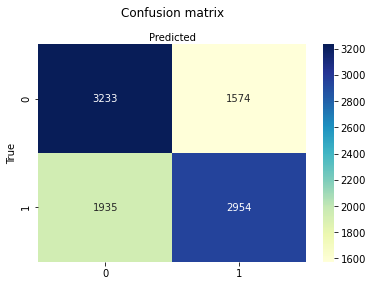

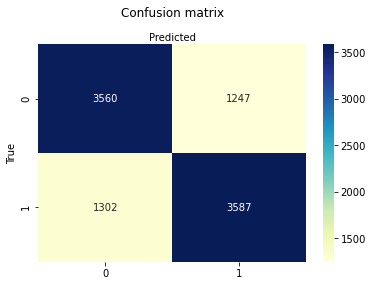

In [67]:
#start increasing the number of regressors and see how the classifier prediction evolves
#use as regressor the neuron with the highest corelation coefficient
neuron_21 = filtered_neural_df.loc[(210301, "J1xCI9", 1), "neuron_21"]
X1=np.expand_dims(neuron_15, axis=1)
log_reg_walk1= logreg_1binvar(X1,bin_var_walk)

filtered_neurons=sort_filtered_neural_df.loc[:,'neuron_21':'neuron_58']
filtered_neurons=filtered_neurons.loc[(210301, "J1xCI9", 1)]

#train classifier
log_reg_walk2= logreg_1binvar(filtered_neurons,bin_var_walk)


Even using the highest correlated neuron as regressor we end up still with a very poor prediction.

However already when adding the second highest correlated neuron to the first one hence having two neurons as regressors the prediction already gets significantly better than before.

Counter({1: 19558, 0: 19226})
Counter({1: 4889, 0: 4807})
   True  Prediction
0     0           0
1     1           1
2     0           0
3     1           1
4     1           1
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      4807
           1       0.76      0.70      0.73      4889

    accuracy                           0.74      9696
   macro avg       0.74      0.74      0.74      9696
weighted avg       0.74      0.74      0.74      9696



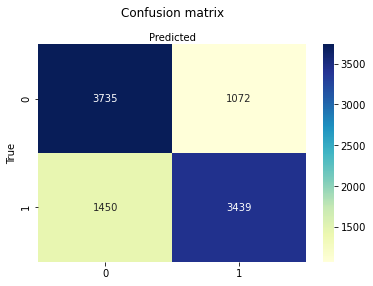

In [68]:
#3 regressors
filtered_neurons=sort_filtered_neural_df.loc[:,'neuron_21':'neuron_82']
filtered_neurons=filtered_neurons.loc[(210301, "J1xCI9", 1)]

#train classifier
log_reg_walk3= logreg_1binvar(filtered_neurons,bin_var_walk)

Counter({1: 19558, 0: 19226})
Counter({1: 4889, 0: 4807})
   True  Prediction
0     0           1
1     1           1
2     1           0
3     0           0
4     1           1
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      4807
           1       0.78      0.74      0.76      4889

    accuracy                           0.76      9696
   macro avg       0.76      0.76      0.76      9696
weighted avg       0.76      0.76      0.76      9696



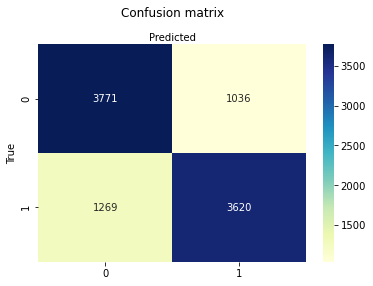

In [69]:
#first 10
filtered_neurons=sort_filtered_neural_df.loc[:,'neuron_21':'neuron_48']
filtered_neurons=filtered_neurons.loc[(210301, "J1xCI9", 1)]

#train classifier
log_reg_walk10= logreg_1binvar(filtered_neurons,bin_var_walk)

From 3 to 10 performance is improved but is still not predicting very precisely.

Counter({1: 19558, 0: 19226})
Counter({1: 4889, 0: 4807})
   True  Prediction
0     1           1
1     1           1
2     0           0
3     1           1
4     1           1
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      4807
           1       0.80      0.80      0.80      4889

    accuracy                           0.80      9696
   macro avg       0.80      0.80      0.80      9696
weighted avg       0.80      0.80      0.80      9696



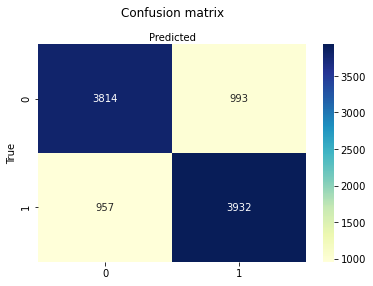

In [73]:
filtered_neurons=sort_filtered_neural_df.loc[:,'neuron_21':'neuron_22']
filtered_neurons=filtered_neurons.loc[(210301, "J1xCI9", 1)]

#train classifier
log_reg_walk20= logreg_1binvar(filtered_neurons,bin_var_walk)


Already with 20 regressors we are very close to the performance reached with all the 123 neurons.

Counter({1: 19558, 0: 19226})
Counter({1: 4889, 0: 4807})
   True  Prediction
0     0           0
1     1           1
2     0           0
3     1           1
4     1           0
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      4807
           1       0.80      0.81      0.81      4889

    accuracy                           0.80      9696
   macro avg       0.80      0.80      0.80      9696
weighted avg       0.80      0.80      0.80      9696



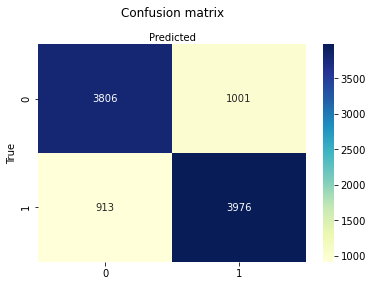

In [74]:
filtered_neurons=sort_filtered_neural_df.loc[:,'neuron_21':'neuron_101']
filtered_neurons=filtered_neurons.loc[(210301, "J1xCI9", 1)]

#train classifier
log_reg_walk30= logreg_1binvar(filtered_neurons,bin_var_walk)


With aobut 30 regressors perfomace is already practically in par with all the neurons as regressors.

Counter({1: 19558, 0: 19226})
Counter({1: 4889, 0: 4807})
   True  Prediction
0     0           0
1     0           0
2     0           0
3     0           0
4     0           0
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      4807
           1       0.81      0.85      0.83      4889

    accuracy                           0.82      9696
   macro avg       0.82      0.82      0.82      9696
weighted avg       0.82      0.82      0.82      9696



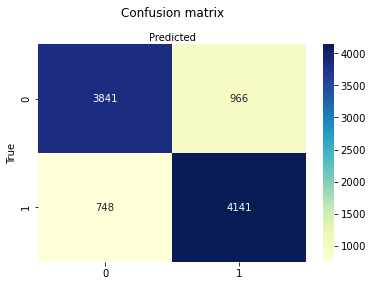

In [76]:
filtered_neurons=sort_filtered_neural_df.loc[:,'neuron_21':'neuron_68']
filtered_neurons=filtered_neurons.loc[(210301, "J1xCI9", 1)]

#train classifier
log_reg_walk50= logreg_1binvar(filtered_neurons,bin_var_walk)

Very similar performance results to 20 regressors and identical to the case where using all the neurons.

Counter({1: 19558, 0: 19226})
Counter({1: 4889, 0: 4807})
   True  Prediction
0     1           0
1     1           1
2     0           0
3     0           1
4     1           1
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      4807
           1       0.81      0.85      0.83      4889

    accuracy                           0.82      9696
   macro avg       0.82      0.82      0.82      9696
weighted avg       0.82      0.82      0.82      9696



Text(0.5, 15.0, 'Predicted')

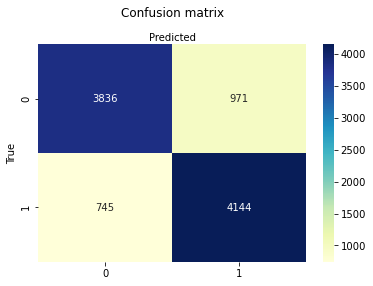

In [79]:
filtered_neurons=sort_filtered_neural_df.loc[:,'neuron_21':'neuron_113']
filtered_neurons=filtered_neurons.loc[(210301, "J1xCI9", 1)]
X_train, X_test, y_train, y_test = train_test_split(filtered_neurons, bin_var_walk, test_size=0.2, stratify=bin_var_walk)
    
    #preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
    
    #check the proportions of the two labels in the train and test, stratify assures proportions are the same
    #if not stratified and the two labels have very different quantities in the test or train
    #there may not be any of one of the two labels making the training unconclusive
print(Counter(y_train))
print(Counter(y_test))
    
    #build the classifier and train it
model = LogisticRegression(max_iter=1000,random_state=10) #increased max iteration in order to reach convergence, 
#however even without that results are basically the same which speaks for the classifier being quite stable despite 
#not converging
model.fit(X_train, y_train)
    
    #make prediction and print classification report
y_pred = pd.Series(model.predict(X_test))
y_test = pd.Series(y_test)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z.head())
print(metrics.classification_report(y_test, y_pred))
    #get confusion matrix and print it
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In the confusion matrix resulting from the prediciton from the model trained on all the neurons we see that 3912 times where the fly was not showing walking behavior were correctly predicted as not walking while 895 ones where the fly was not walking were predicted incorrectly as walking

665 times where the fly was showing walking behavior were predicted incorrectly while 4224 ones where the fly was walking were predicted correctly as walking.

## Part 2.1.3


In [83]:
coeff = model.coef_
print(coeff)
print(np.count_nonzero((abs(coeff))>=0.2))

[[ 0.1537239  -0.02324495 -0.01825857  0.32205326 -0.25975316  0.65722388
   0.35419075  0.36628454  0.29959791 -0.31915977  0.00798376 -0.19537132
   0.13927827  0.2246436  -0.07208056 -0.04623829 -0.12758966  0.10716576
  -0.58617497 -0.61442048  0.56375421 -0.43958128 -0.17708567 -0.24904832
  -0.46540607  0.32264932  0.24063561 -0.22444217 -0.21816483  0.44821655
  -0.26397592 -0.42064761  0.25671224 -0.15671981 -0.09843358 -0.65264985
  -0.59733795  0.16729439 -0.66255722  0.19239405 -0.17123431  0.0667225
   0.69754725  1.95057569  0.00196111 -0.27465177  0.48236843 -0.39042343
  -0.08269529  0.03062345]]
30


If we consider as meaningful just the weights whose absolute value is >=0.1 then just 30 out of 123 Neurons are taken into consideration by the classifier. This was expected looking at the previous results where the case of just 20 regressors was comparable in terms of accuracy of prediction to the case of thee full dataset.

## Part 2.1.4
Try the same thing with other behaviours (e.g., anterior grooming). Can you classify
those with the same accuracy?

In [84]:
# reduce binary variable for every behavior
#resting
bin_var_rest=np.where(reduced=='resting',1,0)
bin_var_rest= bin_var_rest.tolist()
#ab_push
bin_var_ap=np.where(reduced=='abdominal_pushing',1,0)
bin_var_ap= bin_var_ap.tolist()
#ant_groom
bin_var_ag=np.where(reduced=='anterior_grooming',1,0)
bin_var_ag= bin_var_ag.tolist()
#post_groom not sure if to include as it is super rare beahvior
bin_var_pg=np.where(reduced=='posterior_grooming',1,0)
bin_var_pg= bin_var_pg.tolist()

Resting
Counter({0: 24770, 1: 14014})
Counter({0: 6193, 1: 3503})
   True  Prediction
0     1           1
1     1           1
2     1           1
3     0           0
4     1           1
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6193
           1       0.86      0.78      0.81      3503

    accuracy                           0.87      9696
   macro avg       0.87      0.85      0.86      9696
weighted avg       0.87      0.87      0.87      9696



LogisticRegression(random_state=10)

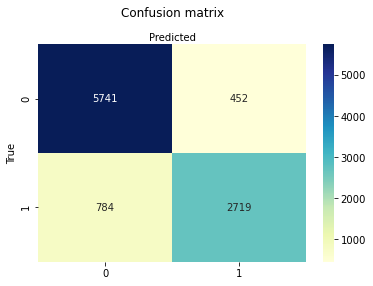

In [87]:
# train and test with binary resting varaibles and other behaviors
print("Resting")
logreg_1binvar(filtered_neurons,bin_var_rest)

Abdnominal pushing
Counter({0: 37813, 1: 971})
Counter({0: 9453, 1: 243})


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   True  Prediction
0     0           0
1     0           0
2     0           0
3     0           0
4     0           0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9453
           1       0.93      0.83      0.88       243

    accuracy                           0.99      9696
   macro avg       0.96      0.91      0.94      9696
weighted avg       0.99      0.99      0.99      9696



LogisticRegression(random_state=10)

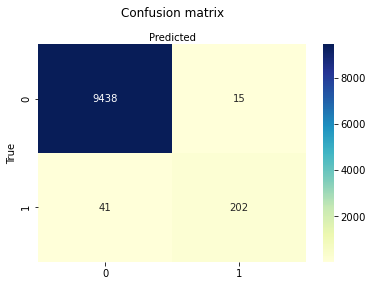

In [88]:
print("Abdnominal pushing")
logreg_1binvar(filtered_neurons,bin_var_ap)

Anterior Grooming
Counter({0: 34826, 1: 3958})
Counter({0: 8707, 1: 989})
   True  Prediction
0     0           0
1     0           0
2     0           0
3     0           0
4     1           0
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8707
           1       0.66      0.29      0.41       989

    accuracy                           0.91      9696
   macro avg       0.79      0.64      0.68      9696
weighted avg       0.90      0.91      0.90      9696



LogisticRegression(random_state=10)

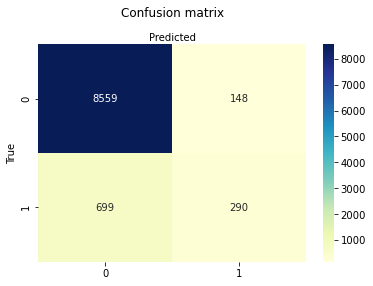

In [89]:
print("Anterior Grooming")
logreg_1binvar(filtered_neurons,bin_var_ag)

Posterior Grooming 
As this behavior is very rare is impossible to train a classifier and would not be in very precise in the case the other thing was feasible
Counter({0: 38500, 1: 284})
Counter({0: 9625, 1: 71})
   True  Prediction
0     0           0
1     0           0
2     0           0
3     0           0
4     0           0
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9625
           1       0.92      0.15      0.27        71

    accuracy                           0.99      9696
   macro avg       0.96      0.58      0.63      9696
weighted avg       0.99      0.99      0.99      9696



LogisticRegression(random_state=10)

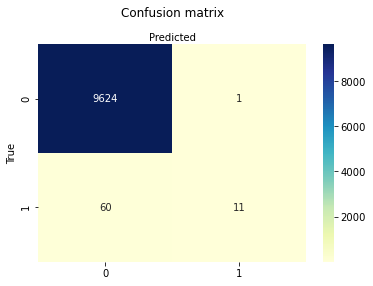

In [90]:
print("Posterior Grooming \nAs this behavior is very rare is impossible to train a classifier and would not be in very precise in the case the other thing was feasible")
logreg_1binvar(filtered_neurons,bin_var_pg)

We can see here a comparison between the different behaviors for their prediction with always a binary variable as output.

## Part 2.2: Predicting multiple behaviours


1. Predict all behaviours at once with multi-class logistic regression. How much
performance can your model achieve compared to predicting individual behaviours?

In [91]:
# assign variables to every behavior
#Mult_beh_var=np.unique(reduced,return_inverse=True)[1].tolist()
my_dict = {'resting': 0, 'walking': 1, 'abdominal_pushing': 2, 'anterior_grooming': 3, 'posterior_grooming': 4}
Mult_beh_var=[my_dict[zi] for zi in reduced]

Counter({1: 19557, 0: 14014, 3: 3958, 2: 971, 4: 284})
Counter({1: 4890, 0: 3503, 3: 989, 2: 243, 4: 71})
   True  Prediction
0     0           1
1     3           1
2     0           0
3     1           1
4     1           1
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      3503
           1       0.80      0.89      0.84      4890
           2       0.91      0.88      0.89       243
           3       0.58      0.37      0.45       989
           4       0.77      0.24      0.37        71

    accuracy                           0.80      9696
   macro avg       0.78      0.64      0.67      9696
weighted avg       0.79      0.80      0.79      9696



Text(0.5, 15.0, 'Predicted')

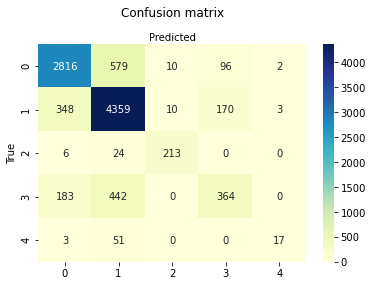

In [93]:
X_train, X_test, y_train, y_test = train_test_split(filtered_neurons, Mult_beh_var, test_size=0.2, stratify=Mult_beh_var)
    #preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
    #check if there may have been a problem with could be resolved with stratified split
print(Counter(y_train))
print(Counter(y_test))
    #build the classifier and train it
model = LogisticRegression(max_iter=1000,random_state=10) #multiclass left to auto settings
model.fit(X_train, y_train)
    #make prediction and give brief visualization of prediction
y_pred = pd.Series(model.predict(X_test))
y_test = pd.Series(y_test)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z.head())
print(metrics.classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0, 1, 2, 3, 4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [94]:
coeff = model.coef_
print(coeff)
print(np.count_nonzero((abs(coeff))>=0.1))

[[-4.59396513e-01 -2.69708055e-01  4.64690475e-01 -4.36152316e-01
  -2.27622100e-03  4.25074442e-02  2.41785293e-01 -7.29316595e-01
   1.11118461e-01  2.93002514e-01 -5.44123653e-01 -1.22606995e-01
   4.87955892e-01  5.32376040e-01  2.71761510e-01  4.63848821e-01
  -4.32288122e-01  2.50038804e-01  2.89892951e-01 -3.26098037e-01
  -4.59497140e-01  4.73981030e-01  9.23470306e-01  2.85647406e-02
  -5.23649469e-01 -5.53051298e-01 -3.36430243e-01  6.31123211e-01
   4.86252706e-01  2.48196581e-01  5.85674367e-03  1.11322029e-01
  -1.03233806e-01  4.99774869e-01 -4.23411632e-01 -3.06252684e-01
   1.23955725e-01 -2.95167315e-01  3.51102558e-01 -5.48728328e-01
   6.58318770e-01  9.27966771e-01 -1.12011907e+00 -9.29972835e-01
  -4.64306653e-02  6.24193154e-01 -1.65396361e-01 -1.30097297e-01
   3.04957731e-01 -8.12476177e-02]
 [-2.25379436e-01 -1.90306436e-01  1.80967654e-01 -1.36005942e-02
  -2.49553112e-01  6.43456469e-01  6.75010016e-01 -1.66411706e-01
   3.42546410e-01 -2.69723853e-03 -5.1488

Multiple neurons contribute to the prediction.

## Part 2.2.2

In [96]:
from sklearn.neural_network import MLPClassifier

Counter({1: 19557, 0: 14014, 3: 3958, 2: 971, 4: 284})
Counter({1: 4890, 0: 3503, 3: 989, 2: 243, 4: 71})
   True  Prediction
0     1           1
1     1           1
2     0           0
3     0           0
4     0           1
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3503
           1       0.92      0.93      0.93      4890
           2       0.95      0.97      0.96       243
           3       0.83      0.77      0.80       989
           4       0.92      0.76      0.83        71

    accuracy                           0.91      9696
   macro avg       0.91      0.87      0.89      9696
weighted avg       0.91      0.91      0.91      9696



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 15.0, 'Predicted')

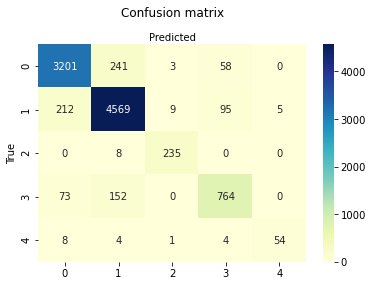

In [97]:
X_train, X_test, y_train, y_test = train_test_split(filtered_neurons, Mult_beh_var, test_size=0.2, stratify=Mult_beh_var)
    #preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
    #check if there may have been a problem with could be resolved with stratified split
print(Counter(y_train))
print(Counter(y_test))
    #build the classifier and train it
model =  MLPClassifier(random_state=39) #multiclass left to auto settings
model.fit(X_train, y_train)
    #make prediction and give brief visualization of prediction
y_pred = pd.Series(model.predict(X_test))
y_test = pd.Series(y_test)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z.head())
print(metrics.classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0, 1, 2, 3, 4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

Text(0.5, 0, 'Number of steps')

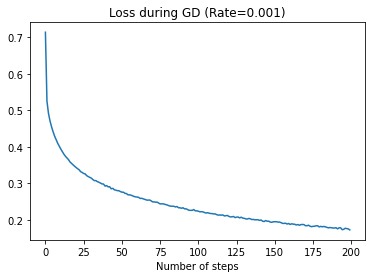

In [98]:
#check evolution of loss function
fig, ax = plt.subplots()
ax.plot(model.loss_curve_)
ax.set_title('Loss during GD (Rate=0.001)')
ax.set_ylabel('Loss function')
ax.set_xlabel('Number of steps')

Text(0.5, 0, 'Number of steps')

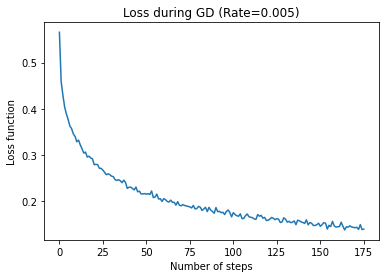

In [102]:
model.learning_rate_init=0.005
model.fit(X_train, y_train)
fig, ax = plt.subplots()
ax.plot(model.loss_curve_)
ax.set_title('Loss during GD (Rate=0.005)')
ax.set_ylabel('Loss function')
ax.set_xlabel('Number of steps')

   True  Prediction
0     1           1
1     1           1
2     0           0
3     0           0
4     0           0
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      3503
           1       0.92      0.94      0.93      4890
           2       0.99      0.93      0.96       243
           3       0.90      0.76      0.83       989
           4       0.86      0.89      0.88        71

    accuracy                           0.92      9696
   macro avg       0.92      0.89      0.90      9696
weighted avg       0.92      0.92      0.92      9696



Text(0.5, 15.0, 'Predicted')

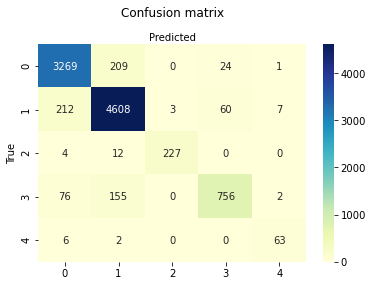

In [101]:
y_pred = pd.Series(model.predict(X_test))
y_test = pd.Series(y_test)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
print(z.head())
print(metrics.classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0, 1, 2, 3, 4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(15, 15))
plot_confusion_matrix(slf_4, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [142]:
#does not converge with default values, try to do a quick grid searc
mlp=MLPClassifier(random_state=39)
parameter_space = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'solver': ['sgd', 'adam'],
    'alpha': [10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1],
    'learning_rate_init': [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10],
}

In [143]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, scoring='accuracy')
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=3, estimator=MLPClassifier(random_state=39), n_jobs=-1,
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1],
                         'hidden_layer_sizes': [(50,), (100,), (200,)],
                         'learning_rate_init': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                                1, 10],
                         'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [144]:
# Best parametee set
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'alpha': 1e-07, 'hidden_layer_sizes': (200,), 'learning_rate_init': 0.001, 'solver': 'adam'}


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       404
           1       0.87      0.83      0.85       106
           2       0.97      0.99      0.98       191
           3       0.95      0.92      0.93       107

    accuracy                           0.95       808
   macro avg       0.94      0.93      0.93       808
weighted avg       0.95      0.95      0.95       808



Text(0.5, 15.0, 'Predicted')

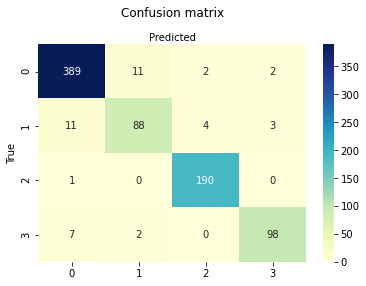

In [145]:
y_pred = pd.Series(clf.predict(X_test))
y_test = pd.Series(y_test)
print(metrics.classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = [0, 1, 2, 3, 4]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

The advantages of Multi-layer Perceptron are:

Capability to learn non-linear models.
Capability to learn models in real-time (on-line learning) using partial_fit.
The disadvantages of Multi-layer Perceptron (MLP) include:

MLP with hidden layers have a non-convex loss function where there exists more than one local minimum. Therefore different random weight initializations can lead to different validation accuracy.
MLP requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
MLP is sensitive to feature scaling.